# Correlation analysis

In this notebook we study the correlation between the burned area during the fire season's months and some climate indexes for each pixel.

First, we consider the correlation between the sum of the burned area of the fire season's months and the average of the indexes in these months. We apply that to the unimodal fire seasons and then to the main fire season of bimodal fire seasons.

Then we consider the correlation between the sum of the burned area of the fire season's months and the average of the indexes in the previous months. Firstly, we will consider the climate index time series of the previous month, i.e., if the fire season is May and June, we will use the data of April and May. After that, we will use the 2 previous months and 3 previous ones.

We consider the following climate indexes: NAO, EA, WP, EP/NP, PNA, EA/WR, SCAND, POL, NINO3.4, ONI, SOI, but at the end we do not use SOI, ONI and EP/NP.

We use the functions defined in the file *correlation_functions.R*

In [1]:
setwd("..")

In [2]:
source("scripts/correlation_functions.R")

Warning message:
"package 'tidyr' was built under R version 3.6.3"Warning message:
"package 'dplyr' was built under R version 3.6.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Loading required package: sp
Warning message:
"package 'sp' was built under R version 3.6.3"Loading required package: magrittr
Warning message:
"package 'magrittr' was built under R version 3.6.3"
Attaching package: 'magrittr'

The following object is masked from 'package:tidyr':

    extract

Loading required package: RColorBrewer


Loading objects:
  coast.lines


In [3]:
# Data requiered
load("data/ba_mon_time_series_masked.Rdata", verbose = T)
load("fireSeasonPer75_def.Rdata", verbose = T)

Loading objects:
  masked_coords
  dates
  masked_ba_series
Loading objects:
  fireSeasonPer75_def


## Data loading

We check that all the indexes have been standarised used the period between 1981 and 2010. NINA34 and ONI have not, so we standarise them.

In [4]:
nina34 = read.table("CPC/nina34.anom.data.txt", skip = 3, nrows = 72)
colnames(nina34) = c("Year", 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec')
nina34[,-1] = (nina34[,-1] - mean(as.matrix(nina34[32:61,-1]))) / sd(as.matrix(nina34[32:61,-1]))

In [5]:
oni = read.table("CPC/oni.data", skip = 1, nrows = 72, 
                    col.names = c("Year", 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'))
oni[,-1] = (oni[,-1] - mean(as.matrix(oni[32:61,-1]))) / sd(as.matrix(oni[32:61,-1]))

In [6]:
nao = read.table("CPC/nao_index.tim.txt", skip = 8, header = T)
nao <- nao %>% spread(MONTH,INDEX)
colnames(nao) = c("Year", 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec')
mean(as.matrix(nao[32:61,-1]))
sd(as.matrix(nao[32:61,-1]))

[1] 8.333333e-05

[1] 1.001653

In [7]:
poleur = read.table("CPC/poleur_index.tim", skip = 8, header = T)
poleur <- poleur %>% spread(MONTH,INDEX)
colnames(poleur) = c("Year", 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec')
mean(as.matrix(poleur[32:61,-1]))
sd(as.matrix(poleur[32:61,-1]))

[1] 0.0001388889

[1] 1.001456

In [8]:
ea = read.table("CPC/ea_index.tim.txt", skip = 8, header = T)
ea <- ea %>% spread(MONTH,INDEX)
colnames(ea) = c("Year", 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec')
mean(as.matrix(ea[32:61,-1]))
sd(as.matrix(ea[32:61,-1]))

[1] -0.0001388889

[1] 1.001423

In [9]:
eawr = read.table("CPC/eawr_index.tim.txt", skip = 8, header = T)
eawr <- eawr %>% spread(MONTH,INDEX)
colnames(eawr) = c("Year", 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec')
mean(as.matrix(eawr[32:61,-1]))
sd(as.matrix(eawr[32:61,-1]))

[1] -0.0001666667

[1] 1.001118

In [10]:
# falta dec
epnp = read.table("CPC/epnp_index.tim.txt", skip = 8, header = T)
epnp <- epnp %>% spread(MONTH,INDEX)
colnames(epnp) = c("Year", 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec')
mean(as.matrix(epnp[32:61,-c(1,13)]))
sd(as.matrix(epnp[32:61,-c(1,13)]))

[1] 0.0002121212

[1] 1.00141

In [11]:
pna = read.table("CPC/pna_index.tim.txt", skip = 8, header = T)
pna <- pna %>% spread(MONTH,INDEX)
colnames(pna) = c("Year", 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec')
mean(as.matrix(pna[32:61,-1]))
sd(as.matrix(pna[32:61,-1]))

[1] 0.0003333333

[1] 1.001209

In [12]:
scand = read.table("CPC/scand_index.tim.txt", skip = 8, header = T)
scand <- scand %>% spread(MONTH,INDEX)
colnames(scand) = c("Year", 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec')
mean(as.matrix(scand[32:61,-1]))
sd(as.matrix(scand[32:61,-1]))

[1] 2.777778e-05

[1] 1.001176

In [13]:
soi = read.table("CPC/soi.txt", skip = 88, ,nrows = 70,
                 col.names = c("Year", 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'))
mean(as.matrix(soi[31:60,-1]))
sd(as.matrix(soi[31:60,-1]))

[1] 0.001388889

[1] 1.000069

In [14]:
wp = read.table("CPC/wp_index.tim.txt", skip = 8, header = T)
wp <- wp %>% spread(MONTH,INDEX)
colnames(wp) = c("Year", 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec')
mean(as.matrix(wp[32:61,-1]))
sd(as.matrix(wp[32:61,-1]))

[1] 0.0003055556

[1] 1.001415

Warning message:
"package 'psych' was built under R version 3.6.3"

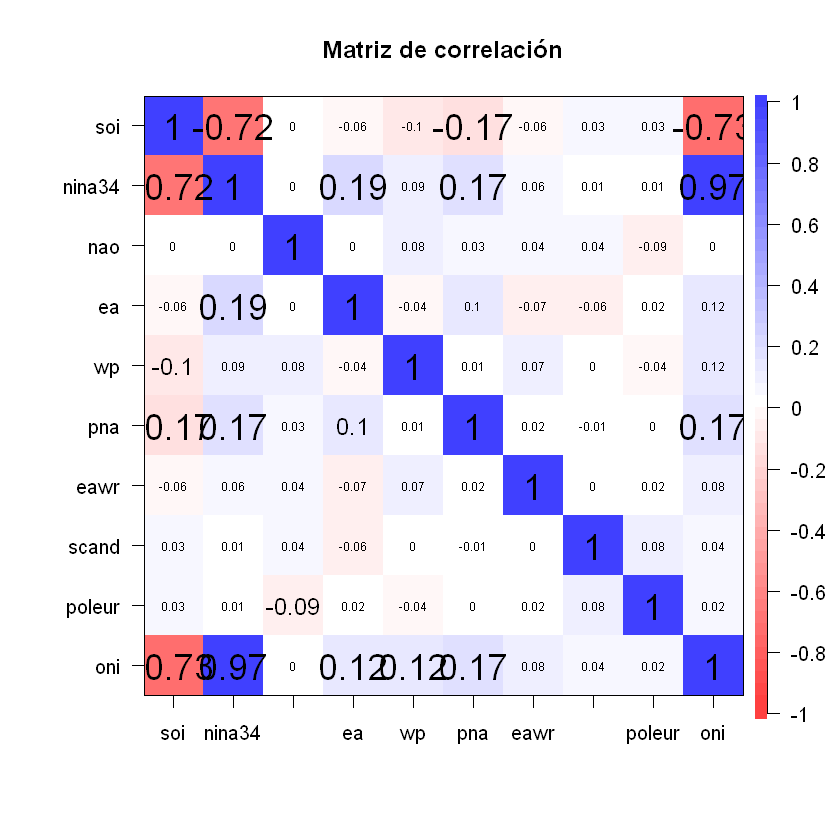

In [15]:
l = list(nina34, nao, ea, wp, pna, eawr, scand, poleur, oni)
M = as.vector(t(as.matrix(soi[1:70,-1])))
for (i in 1:9){
    M = cbind(M, as.vector(t(as.matrix(l[[i]][2:71,-1]))))
}

library(psych)
colnames(M) = c('soi', 'nina34', 'nao', 'ea', 'wp', 'pna', 'eawr', 'scand', 'poleur', 'oni')
corPlot(M, cex = 1.2, main = "Matriz de correlación")

SOI, ONI and NINA34 are strongly correlated. Consequently, we only use the NINO34 index.


## Correlation per cluster

### Unimodal fire season

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

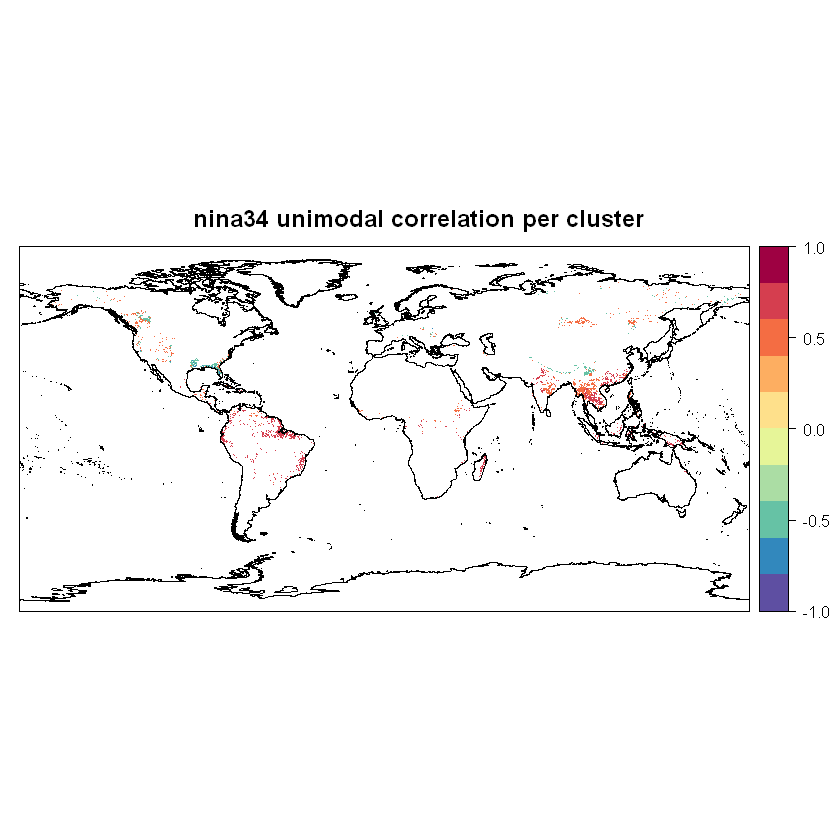

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

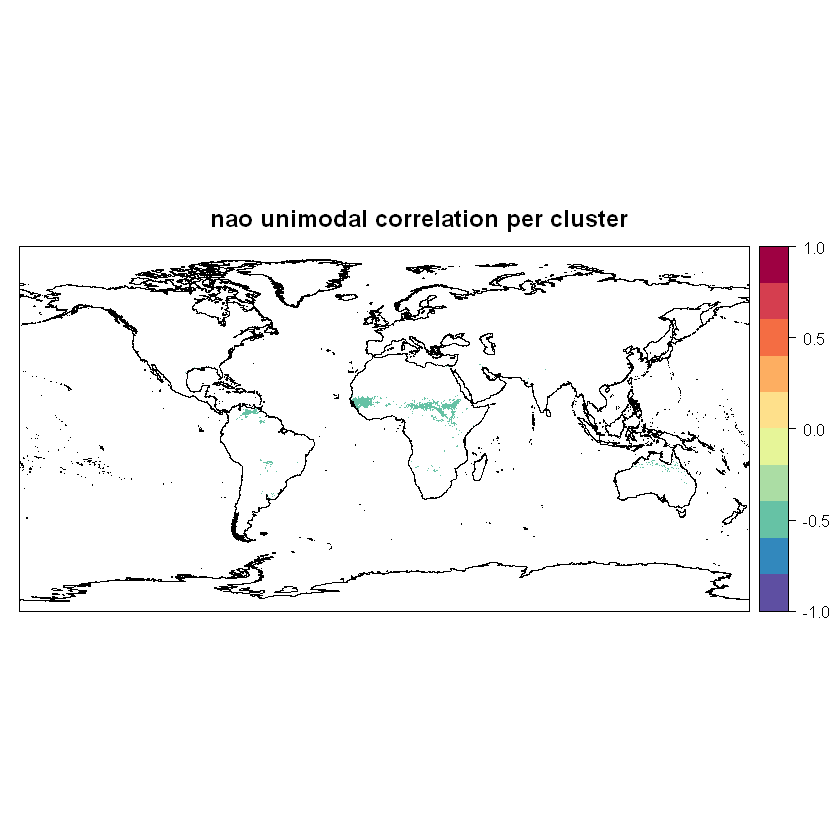

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

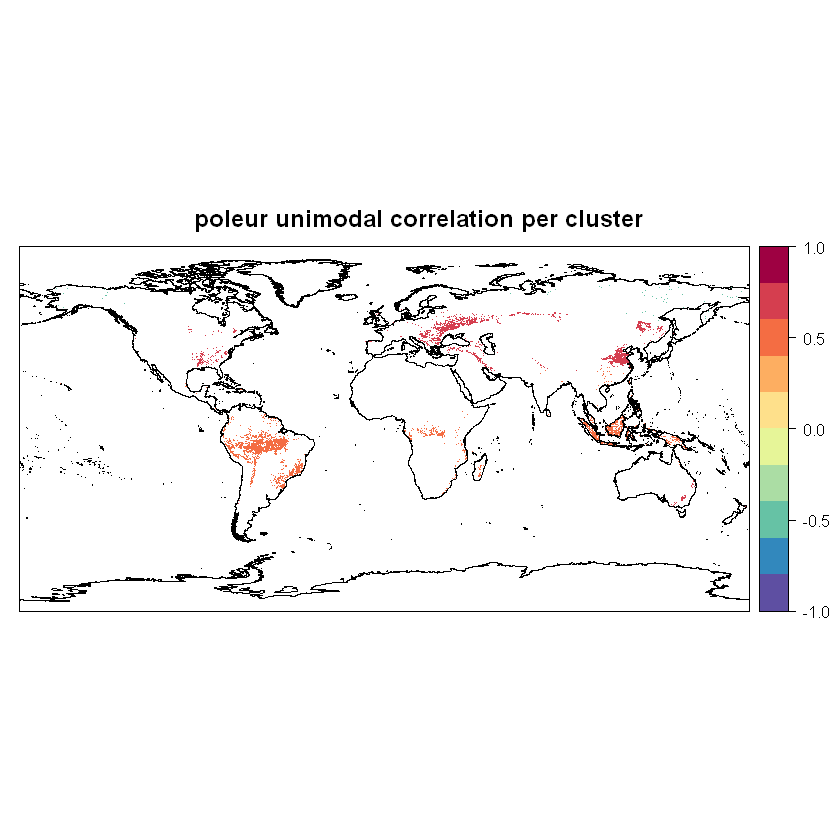

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

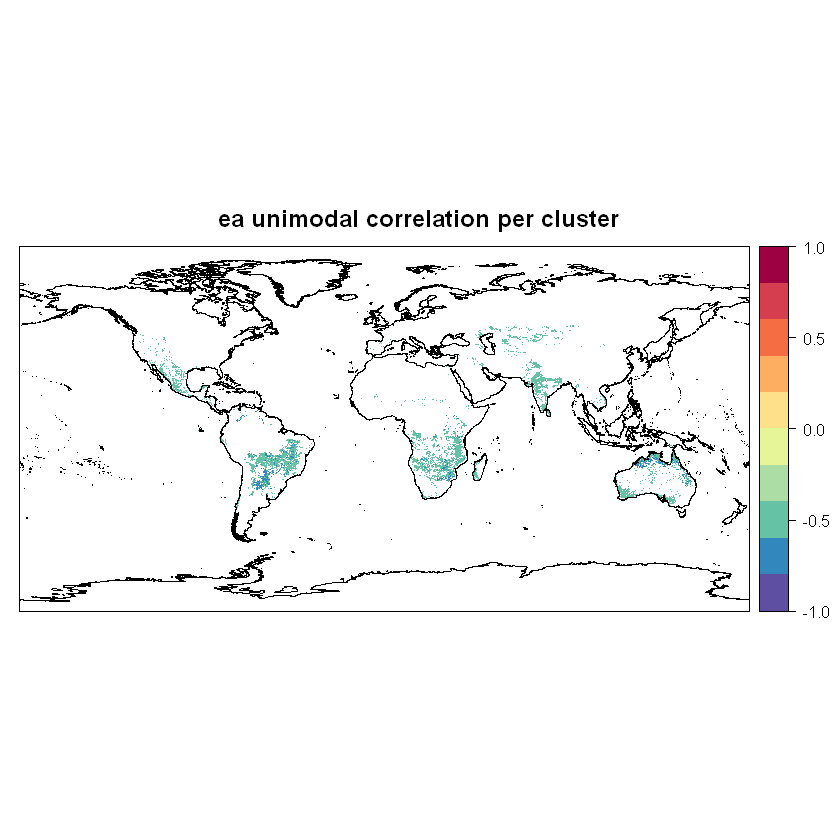

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

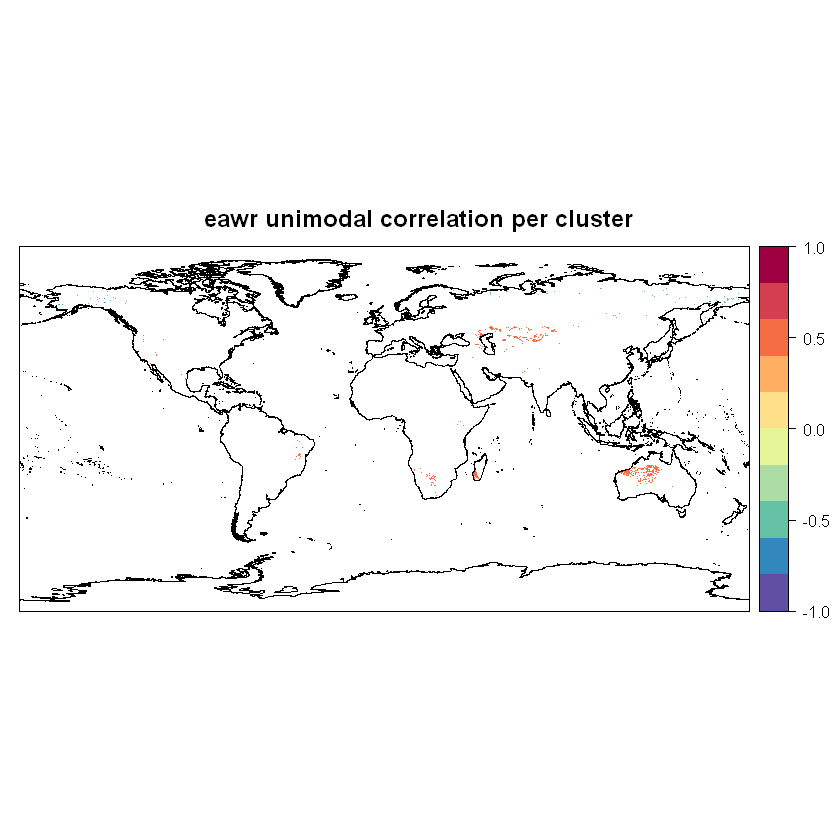

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

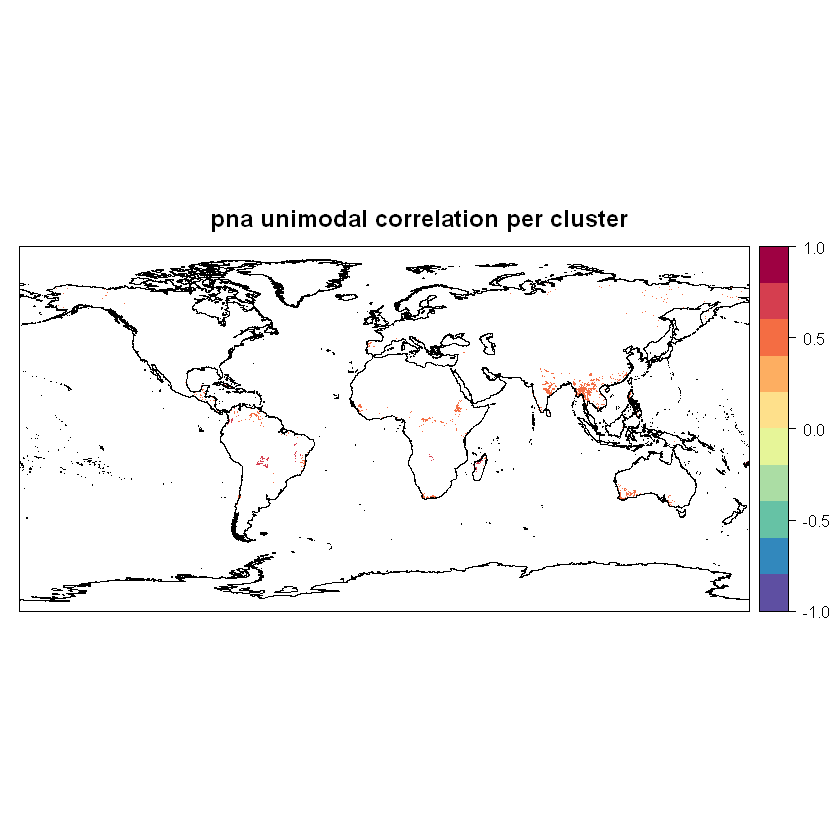

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

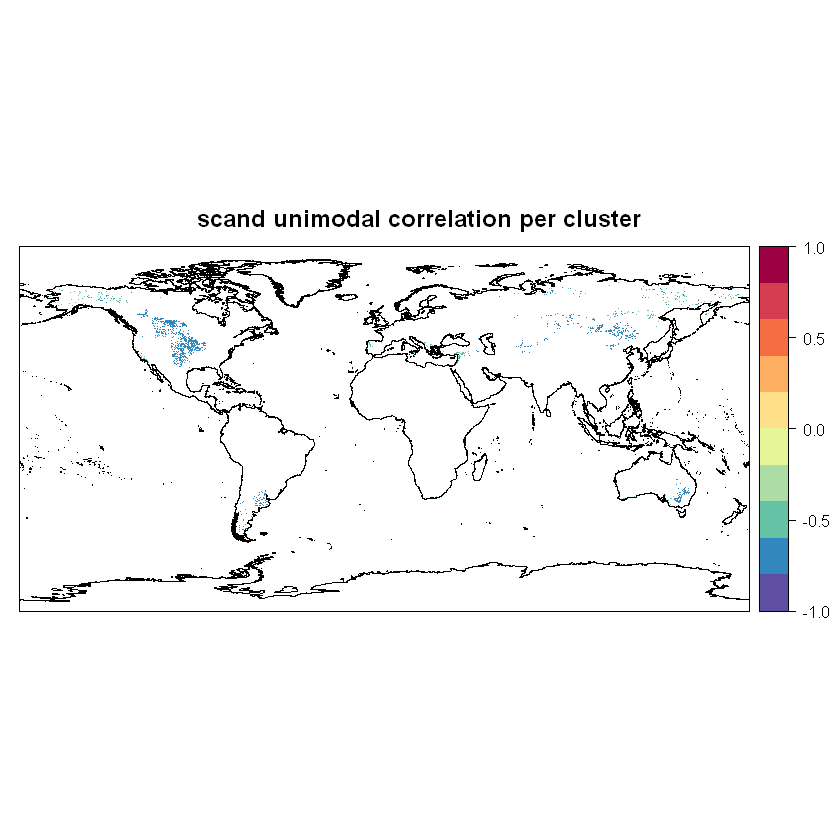

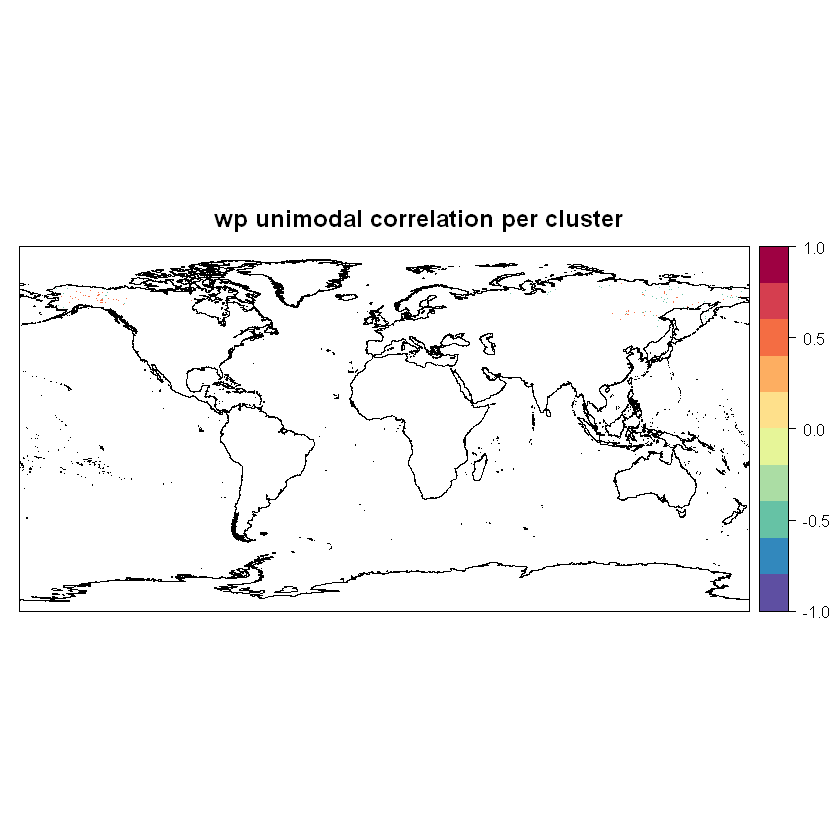

In [16]:
corr.df = masked_coords
corr.df = corr.annual.clus(log1p(masked_ba_series), fireSeasonPer75_def, masked_coords, dates, nina34, 'nina34', corr.df,
                           mode = 'unimodal')
corr.df = corr.annual.clus(log1p(masked_ba_series), fireSeasonPer75_def, masked_coords, dates, nao, 'nao', corr.df,
                           mode = 'unimodal')
corr.df = corr.annual.clus(log1p(masked_ba_series), fireSeasonPer75_def, masked_coords, dates, poleur, 'poleur', corr.df,
                           mode = 'unimodal')
corr.df = corr.annual.clus(log1p(masked_ba_series), fireSeasonPer75_def, masked_coords, dates, ea, 'ea', corr.df, 
                           mode = 'unimodal')
corr.df = corr.annual.clus(log1p(masked_ba_series), fireSeasonPer75_def, masked_coords, dates, eawr, 'eawr', corr.df, 
                           mode = 'unimodal')
corr.df = corr.annual.clus(log1p(masked_ba_series), fireSeasonPer75_def, masked_coords, dates, pna, 'pna', corr.df, 
                           mode = 'unimodal')
corr.df = corr.annual.clus(log1p(masked_ba_series), fireSeasonPer75_def, masked_coords, dates, scand, 'scand', corr.df, 
                           mode = 'unimodal')
corr.df = corr.annual.clus(log1p(masked_ba_series), fireSeasonPer75_def, masked_coords, dates, wp, 'wp', corr.df, 
                           mode = 'unimodal')

save(corr.df, file = 'corrDfAnnualClus.Rdata')

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

Number of pixels correlated with more than  0  indexes  32407 
Number of pixels correlated with more than  1  indexes  2368 
Number of pixels correlated with more than  2  indexes  144 
Number of pixels correlated with more than  3  indexes  0 
Number of pixels correlated with more than  4  indexes  0 
Number of pixels correlated with more than  5  indexes  0 
Number of pixels correlated with more than  6  indexes  0 
Number of pixels correlated with more than  7  indexes  0 


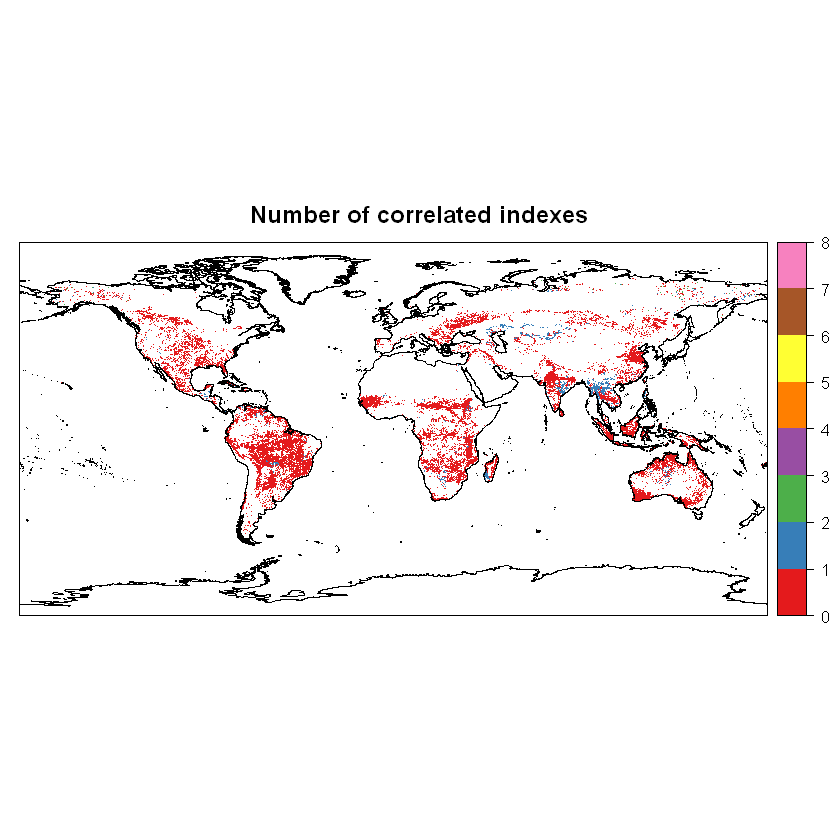

In [17]:
arg.list <- list(col.regions = brewer.pal(8, 'Set1'),
                          at = seq(0, 8, 1), main = 'Number of correlated indexes')

v = cbind(as.numeric(corr.df$nao.pvalue<0.05), as.numeric(corr.df$poleur.pvalue<0.05), as.numeric(corr.df$ea.pvalue<0.05),
          as.numeric(corr.df$eawr.pvalue<0.05), as.numeric(corr.df$pna.pvalue<0.05), as.numeric(corr.df$nina34.pvalue<0.05), 
          as.numeric(corr.df$scand.pvalue<0.05), as.numeric(corr.df$wp.pvalue<0.05))

suma = rowSums(v, na.rm=T)
v <- suma
v[which(v < 1)] <- NA

df1 <- cbind.data.frame(masked_coords, v)
coordinates(df1) <- c(1,2)
gridded(df1) <- TRUE
arg.list[["sp.layout"]] <- list("sp.lines", coast.lines)
arg.list[["obj"]] <- df1
arg.list[["zcol"]] <- 1
arg.list[["ylim"]] <- c(-90,90)
arg.list[["xlim"]] <- c(-180,180)
do.call("spplot", arg.list) %>% print()

for (i in 1:8){
    cat('Number of pixels correlated with more than ', i-1, ' indexes ', sum(suma > i-1), '\n')
}

In [18]:
#' @title Get highest correlation per pixel
#' @description Function for obtaining the highest (in module) correlation of a pixel among all the significant correlations
# that its burned area has with all the climate indexes
#' @param is a row of a correlation dataframe
#' @return the value of the highest correlation
getMaxCorr <- function (row){
    if (all(is.na(row[-c(1,2)])) | sum(row[seq(4, length(row), 2)] < 0.05) < 1){
        return (NA)
    } else {
        ind = which(row[seq(4, length(row), 2)] < 0.05)
        ma = max(row[2*ind+1])
        mi = min(row[2*ind+1])
        if (abs(mi) > abs(ma)){
            return (mi)
        } else {
            return (ma)
        }
    }
}

In [19]:
#' @title Get the climate index which has the highest correlation per pixel
#' @description Function for obtaining the climate index which has the highest (in module) correlation of a pixel among all the
#' significant correlations that its burned area has with all the climate indexes
#' @param is a row of a correlation dataframe
#' @param n.indexes number of different indexes used in corr.df
#' @return the position of the index between 1 and number of the climate indexes
getIndWithMaxCorr <- function (row, n.indexes = 8){
    if (all(is.na(row[-c(1,2)])) | sum(row[seq(4, length(row), 2)] < 0.05) < 1){
        return (NA)
    } else {
        ind = which(row[seq(4, length(row), 2)] < 0.05)
        ma = max(row[2*ind+1])
        mi = min(row[2*ind+1])
        if (abs(mi) > abs(ma)){
            ind.max = which(row[seq(3, length(row)-1, 2)] == mi)
        } else {
            ind.max = which(row[seq(3, length(row)-1, 2)] == ma)
        }
        ind.max = ind.max %% n.indexes
        if (ind.max == 0){
            ind.max = n.indexes
        }
        return (ind.max)
    }
}

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

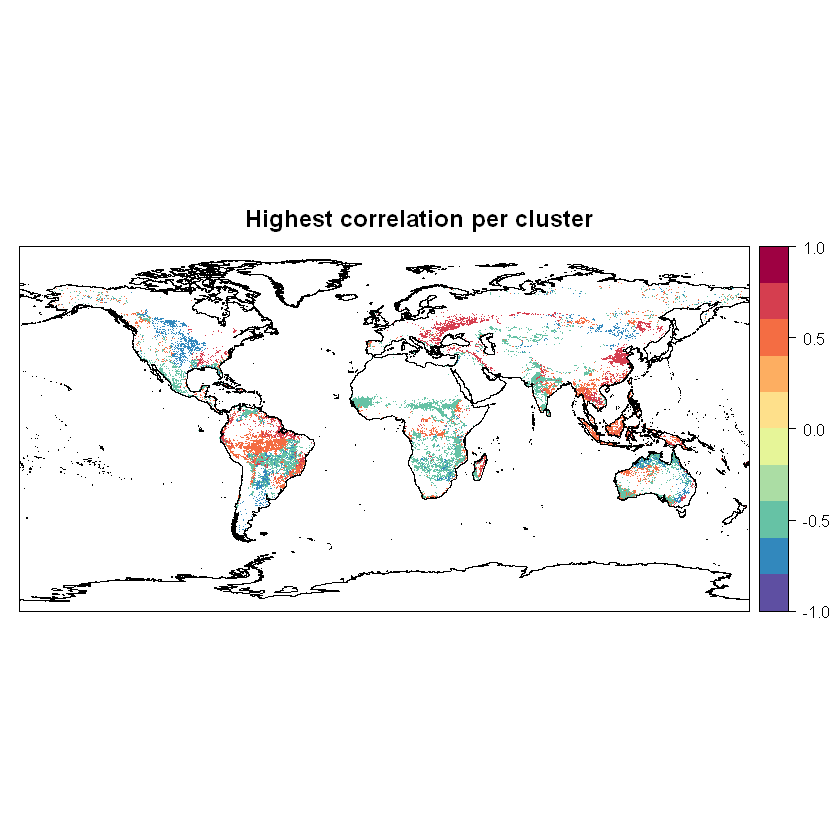

In [20]:
arg.list <- list(col.regions = group.colors[11:1][-6],
                      at = seq(-1, 1, 0.2), main = 'Highest correlation per cluster')

v = apply(corr.df, 1, function (x) getMaxCorr(x))

df1 <- cbind.data.frame(masked_coords, v)
coordinates(df1) <- c(1,2)
gridded(df1) <- TRUE
arg.list[["sp.layout"]] <- list("sp.lines", coast.lines)
arg.list[["obj"]] <- df1
arg.list[["zcol"]] <- 1
arg.list[["ylim"]] <- c(-90,90)
arg.list[["xlim"]] <- c(-180,180)
do.call("spplot", arg.list) %>% print()

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

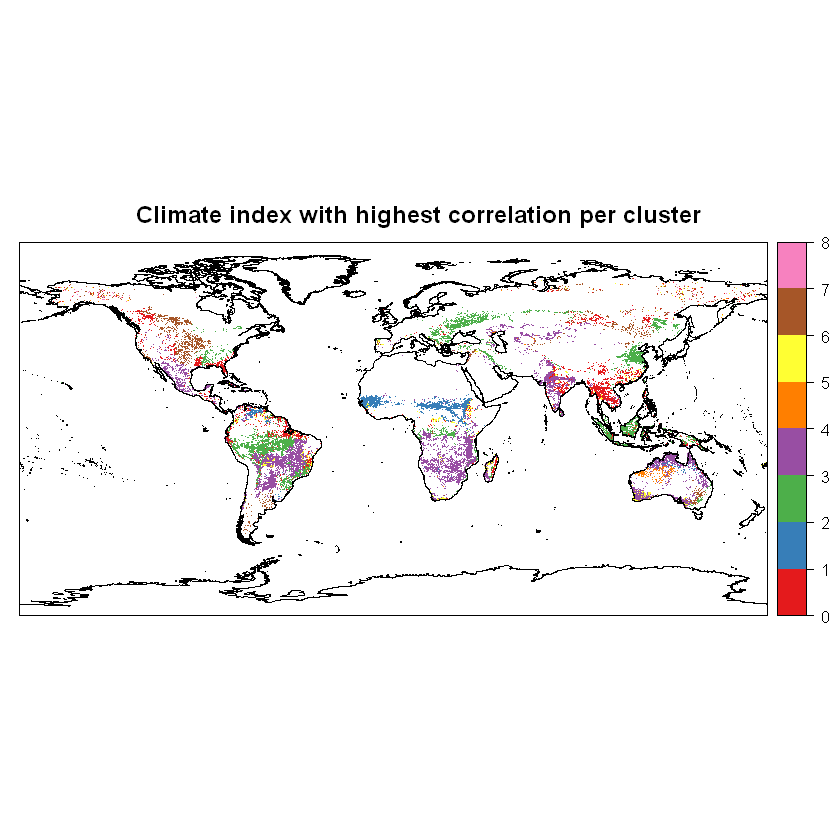

In [21]:
arg.list <- list(col.regions = brewer.pal(8, 'Set1'),
                          at = seq(0, 8, 1), main = 'Climate index with highest correlation per cluster')
v = apply(corr.df, 1, function (x) getIndWithMaxCorr(x))

df1 <- cbind.data.frame(masked_coords, v)
coordinates(df1) <- c(1,2)
gridded(df1) <- TRUE
arg.list[["sp.layout"]] <- list("sp.lines", coast.lines)
arg.list[["obj"]] <- df1
arg.list[["zcol"]] <- 1
arg.list[["ylim"]] <- c(-90,90)
arg.list[["xlim"]] <- c(-180,180)
do.call("spplot", arg.list) %>% print()

## With 1-month persistence

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

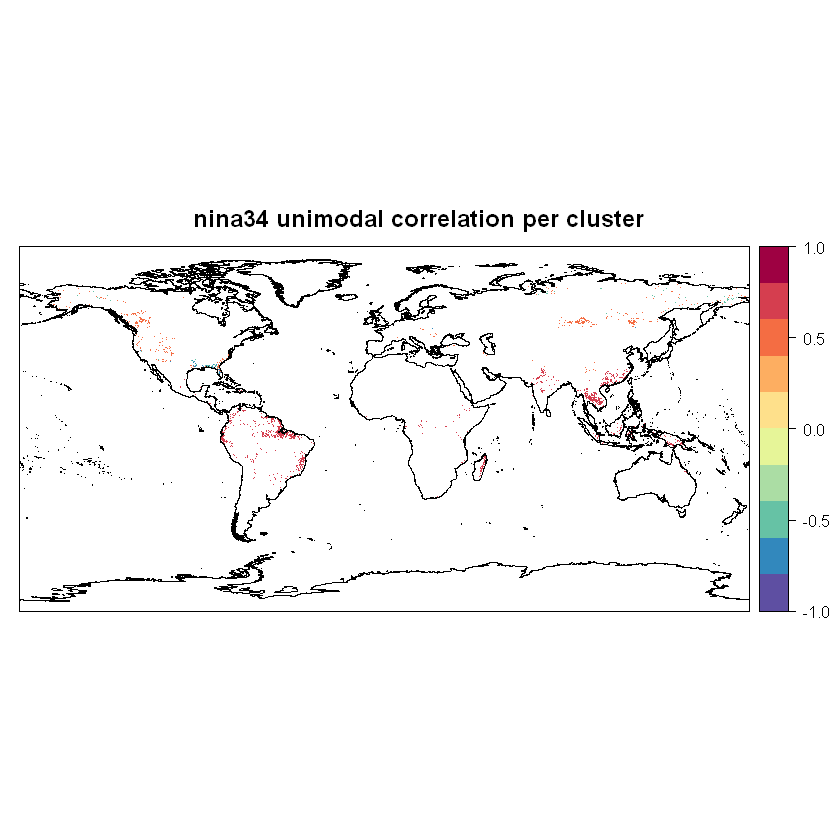

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

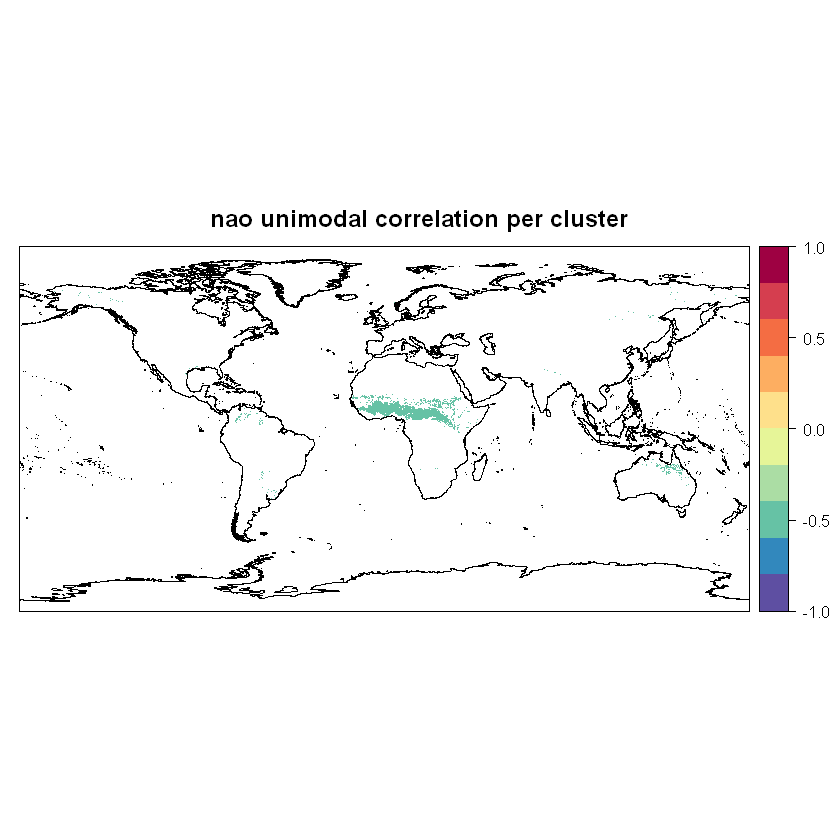

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

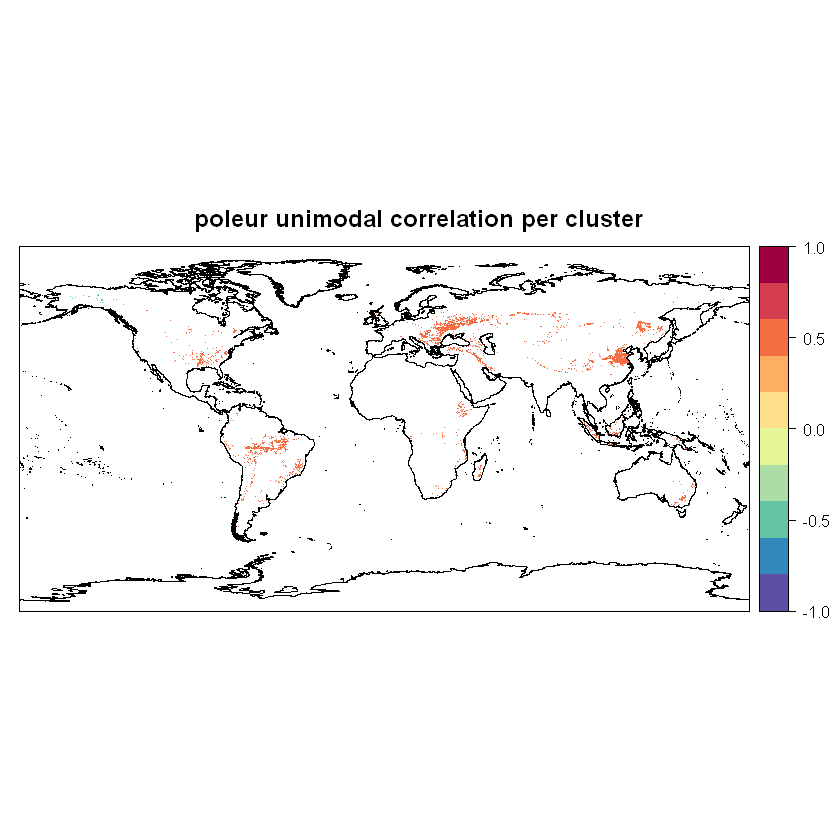

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

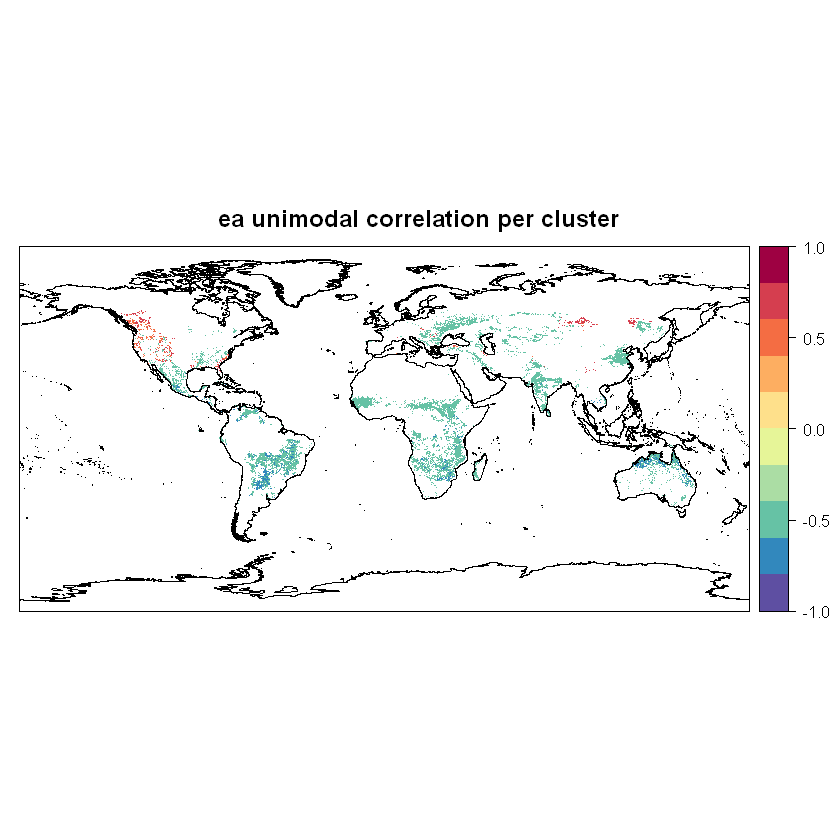

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

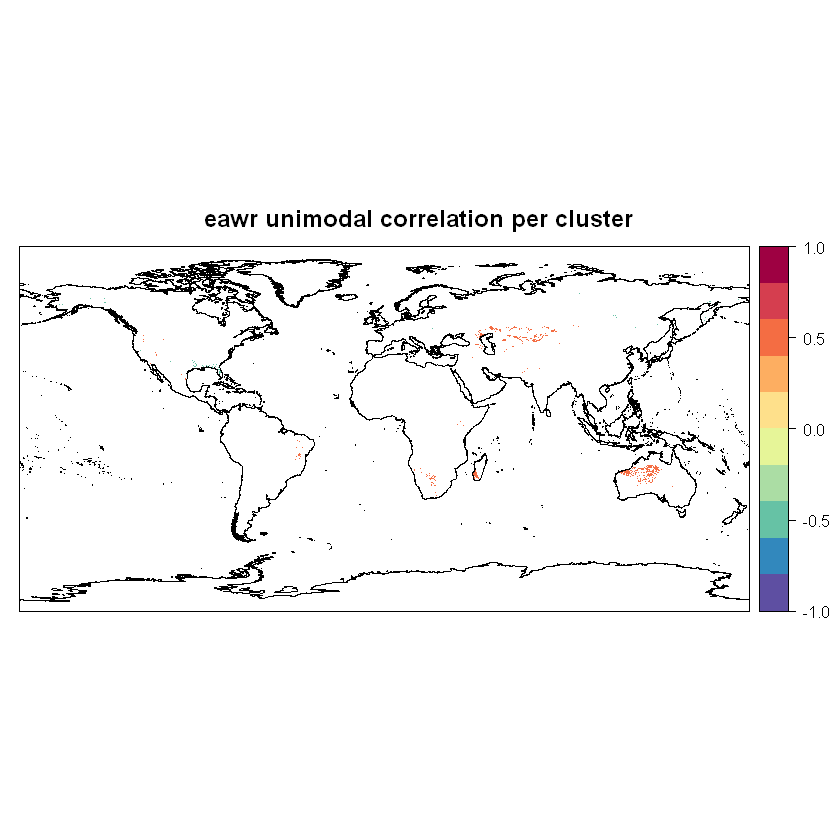

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

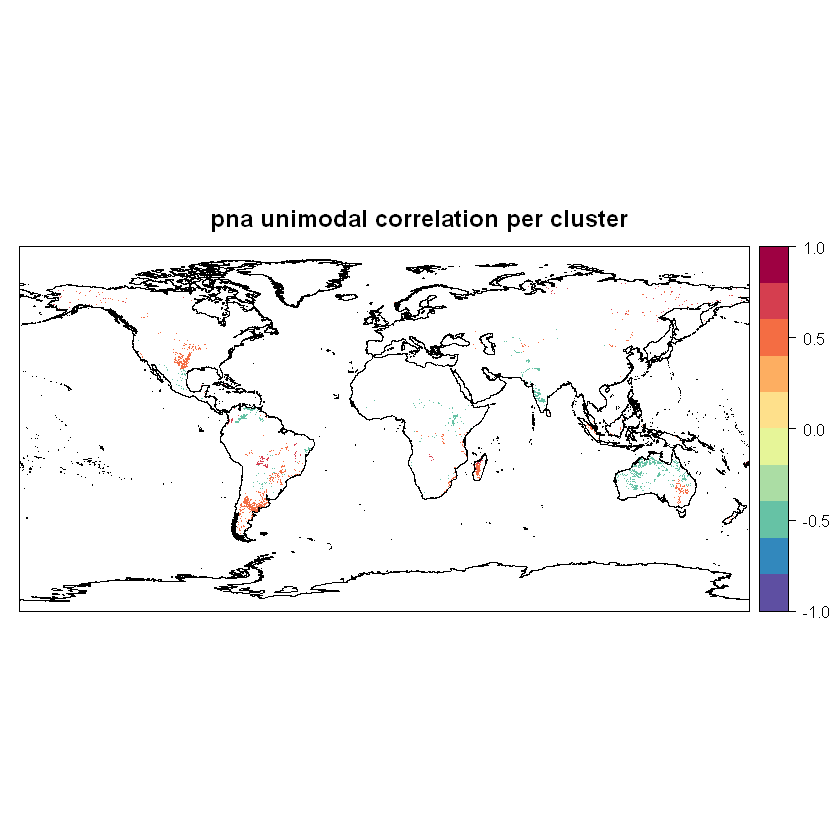

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

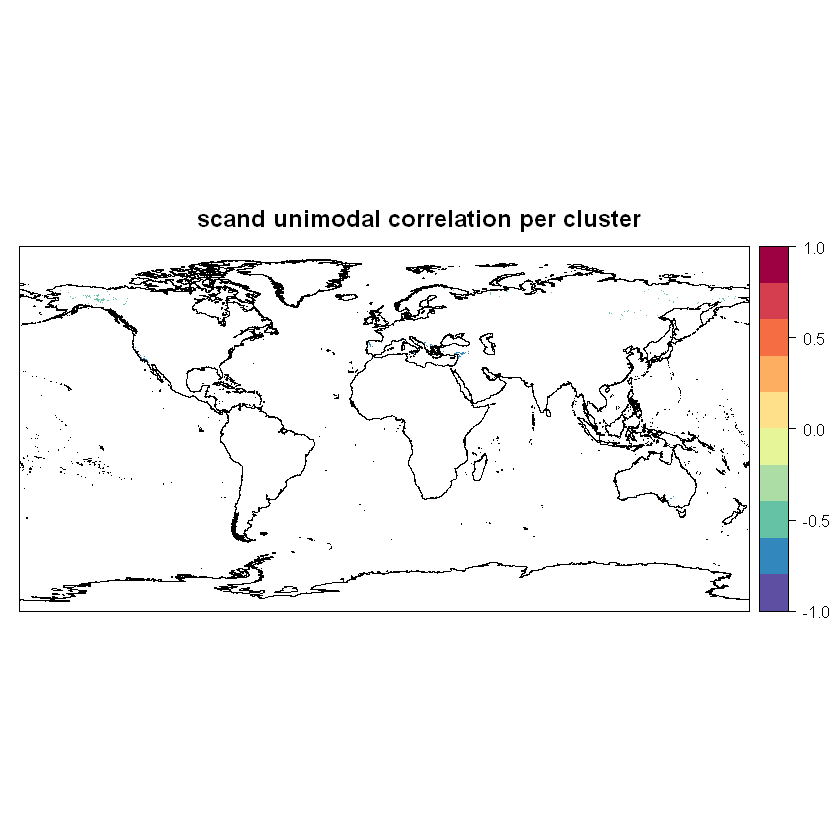

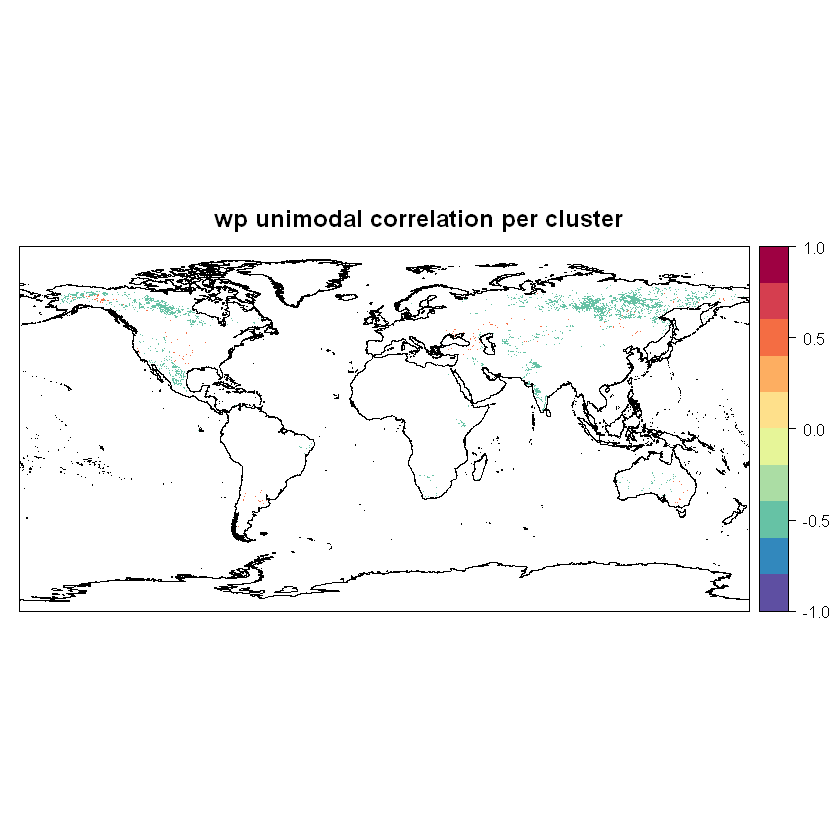

In [24]:
corr.df.lag.1 = masked_coords
t = 1
corr.df.lag.1 = corr.annual.clus(log1p(masked_ba_series), fireSeasonPer75_def, masked_coords, dates, nina34, 'nina34', corr.df.lag.1,
                           mode = 'unimodal', t = t)
corr.df.lag.1 = corr.annual.clus(log1p(masked_ba_series), fireSeasonPer75_def, masked_coords, dates, nao, 'nao', corr.df.lag.1,
                           mode = 'unimodal', t = t)
corr.df.lag.1 = corr.annual.clus(log1p(masked_ba_series), fireSeasonPer75_def, masked_coords, dates, poleur, 'poleur', corr.df.lag.1,
                           mode = 'unimodal', t = t)
corr.df.lag.1 = corr.annual.clus(log1p(masked_ba_series), fireSeasonPer75_def, masked_coords, dates, ea, 'ea', corr.df.lag.1, 
                           mode = 'unimodal', t = t)
corr.df.lag.1 = corr.annual.clus(log1p(masked_ba_series), fireSeasonPer75_def, masked_coords, dates, eawr, 'eawr', corr.df.lag.1, 
                           mode = 'unimodal', t = t)
corr.df.lag.1 = corr.annual.clus(log1p(masked_ba_series), fireSeasonPer75_def, masked_coords, dates, pna, 'pna', corr.df.lag.1, 
                           mode = 'unimodal', t = t)
corr.df.lag.1 = corr.annual.clus(log1p(masked_ba_series), fireSeasonPer75_def, masked_coords, dates, scand, 'scand', corr.df.lag.1, 
                           mode = 'unimodal', t = t)
corr.df.lag.1 = corr.annual.clus(log1p(masked_ba_series), fireSeasonPer75_def, masked_coords, dates, wp, 'wp', corr.df.lag.1, 
                           mode = 'unimodal', t = t)

#save(corr.df.lag.1, file = 'corrDfAnnualClusLag1.Rdata')

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

Number of pixels correlated with more than  0  indexes  37071 
Number of pixels correlated with more than  1  indexes  6700 
Number of pixels correlated with more than  2  indexes  75 
Number of pixels correlated with more than  3  indexes  0 
Number of pixels correlated with more than  4  indexes  0 
Number of pixels correlated with more than  5  indexes  0 
Number of pixels correlated with more than  6  indexes  0 
Number of pixels correlated with more than  7  indexes  0 


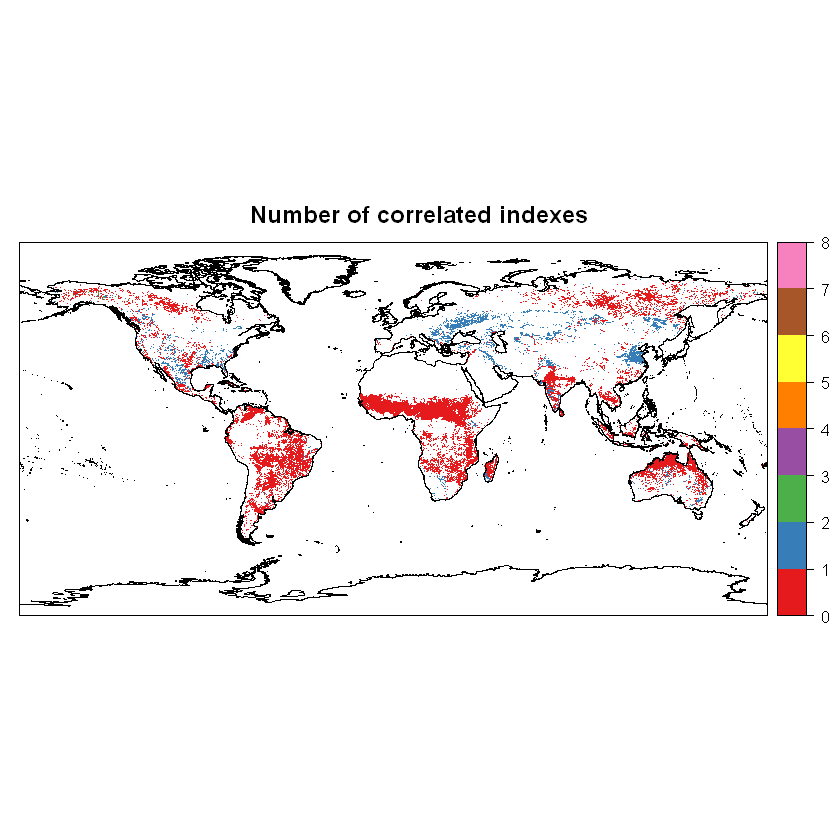

In [25]:
arg.list <- list(col.regions = brewer.pal(8, 'Set1'),
                          at = seq(0, 8, 1), main = 'Number of correlated indexes')

v = cbind(as.numeric(corr.df.lag.1$nao.pvalue<0.05), as.numeric(corr.df.lag.1$poleur.pvalue<0.05),
          as.numeric(corr.df.lag.1$ea.pvalue<0.05), as.numeric(corr.df.lag.1$eawr.pvalue<0.05),
          as.numeric(corr.df.lag.1$pna.pvalue<0.05), as.numeric(corr.df.lag.1$nina34.pvalue<0.05), 
          as.numeric(corr.df.lag.1$scand.pvalue<0.05), as.numeric(corr.df.lag.1$wp.pvalue<0.05))

suma = rowSums(v, na.rm=T)
v <- suma
v[which(v < 1)] <- NA

df1 <- cbind.data.frame(masked_coords, v)
coordinates(df1) <- c(1,2)
gridded(df1) <- TRUE
arg.list[["sp.layout"]] <- list("sp.lines", coast.lines)
arg.list[["obj"]] <- df1
arg.list[["zcol"]] <- 1
arg.list[["ylim"]] <- c(-90,90)
arg.list[["xlim"]] <- c(-180,180)
do.call("spplot", arg.list) %>% print()

for (i in 1:8){
    cat('Number of pixels correlated with more than ', i-1, ' indexes ', sum(suma > i-1), '\n')
}

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

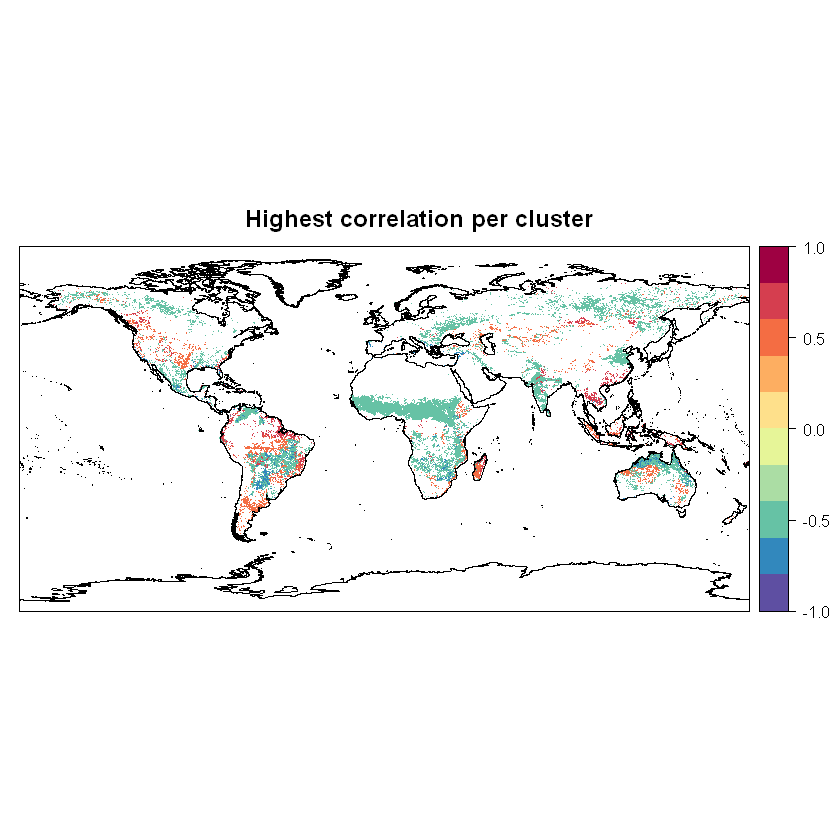

In [26]:
arg.list <- list(col.regions = group.colors[11:1][-6],
                      at = seq(-1, 1, 0.2), main = 'Highest correlation per cluster')

v = apply(corr.df.lag.1, 1, function (x) getMaxCorr(x))

df1 <- cbind.data.frame(masked_coords, v)
coordinates(df1) <- c(1,2)
gridded(df1) <- TRUE
arg.list[["sp.layout"]] <- list("sp.lines", coast.lines)
arg.list[["obj"]] <- df1
arg.list[["zcol"]] <- 1
arg.list[["ylim"]] <- c(-90,90)
arg.list[["xlim"]] <- c(-180,180)
do.call("spplot", arg.list) %>% print()

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

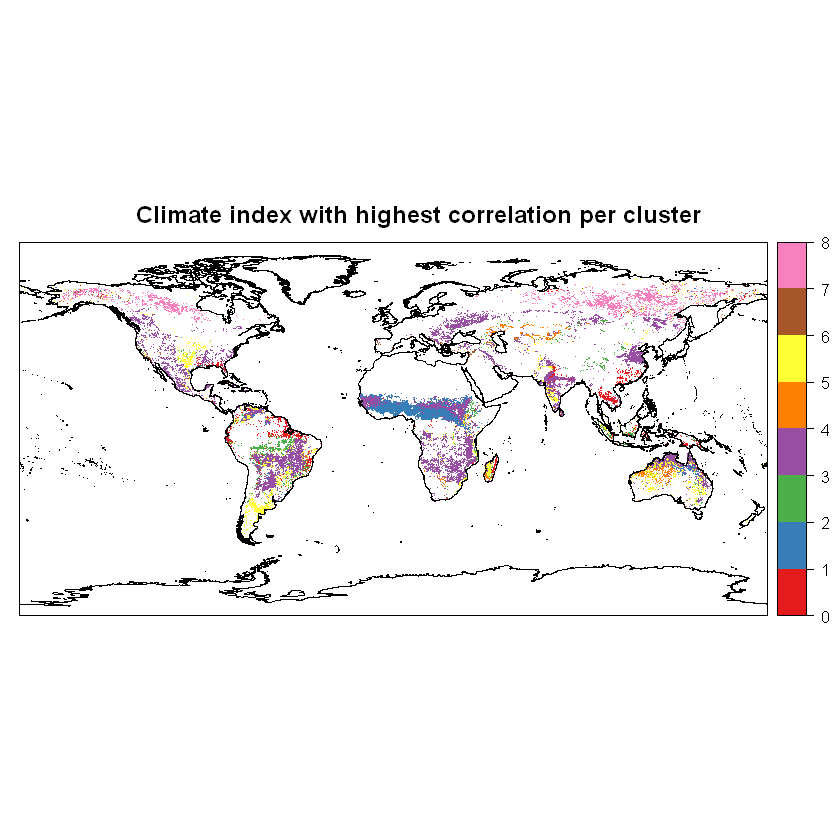

In [27]:
arg.list <- list(col.regions = brewer.pal(8, 'Set1'),
                          at = seq(0, 8, 1), main = 'Climate index with highest correlation per cluster')
v = apply(corr.df.lag.1, 1, function (x) getIndWithMaxCorr(x))

df1 <- cbind.data.frame(masked_coords, v)
coordinates(df1) <- c(1,2)
gridded(df1) <- TRUE
arg.list[["sp.layout"]] <- list("sp.lines", coast.lines)
arg.list[["obj"]] <- df1
arg.list[["zcol"]] <- 1
arg.list[["ylim"]] <- c(-90,90)
arg.list[["xlim"]] <- c(-180,180)
do.call("spplot", arg.list) %>% print()

## With 2-months persistence

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

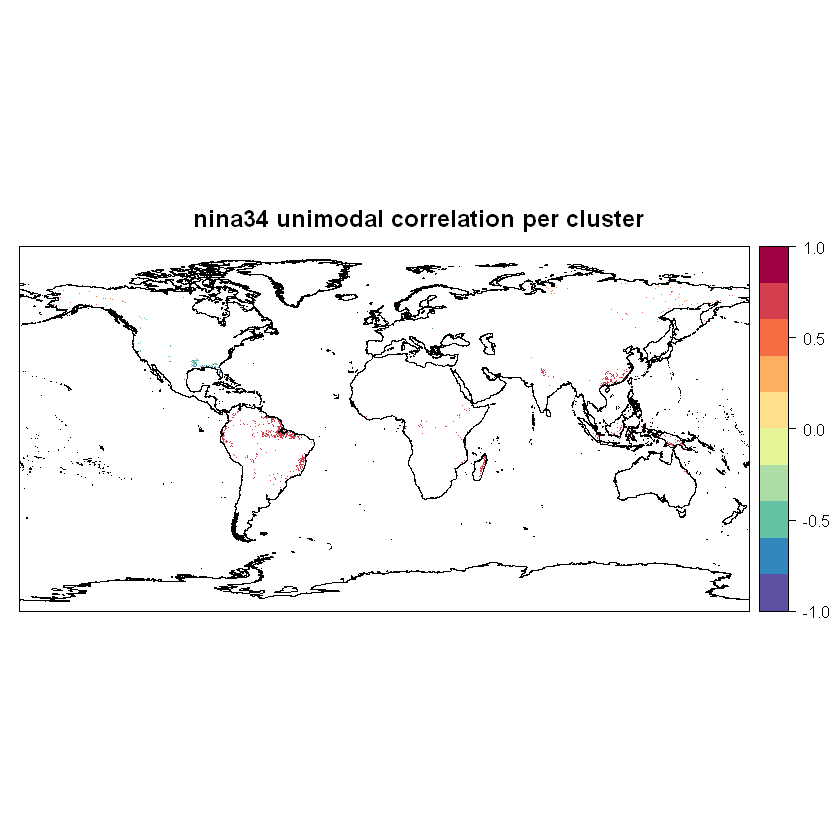

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

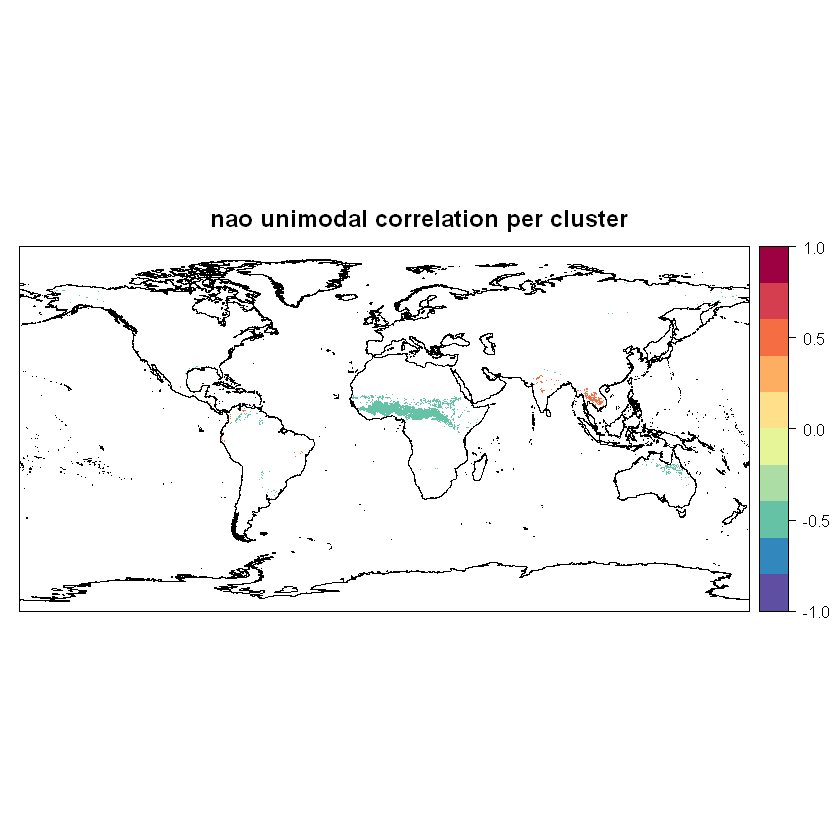

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

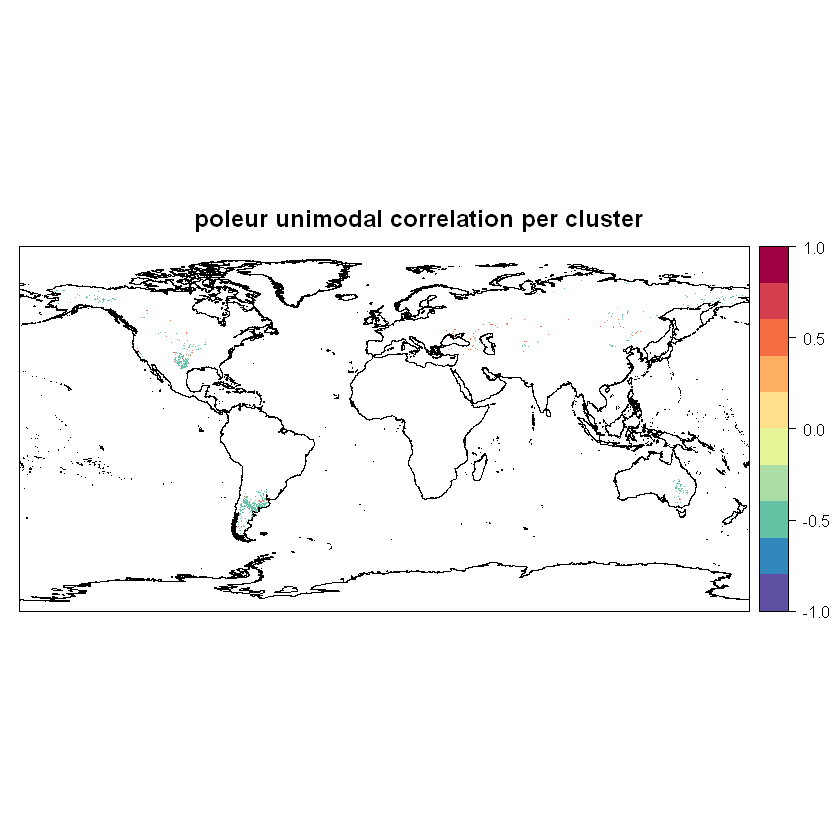

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

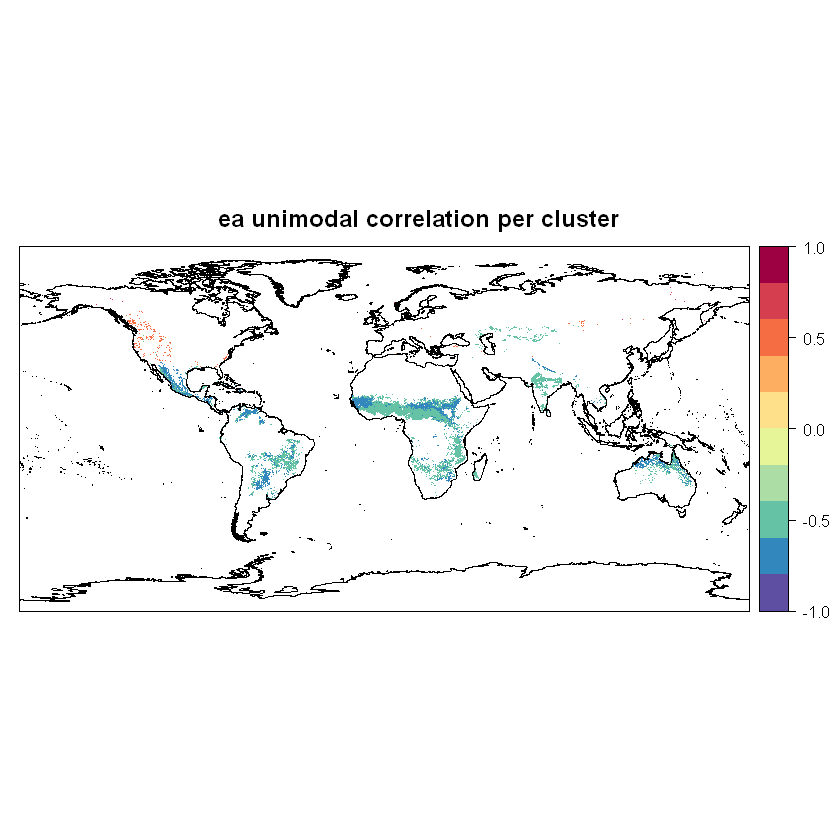

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

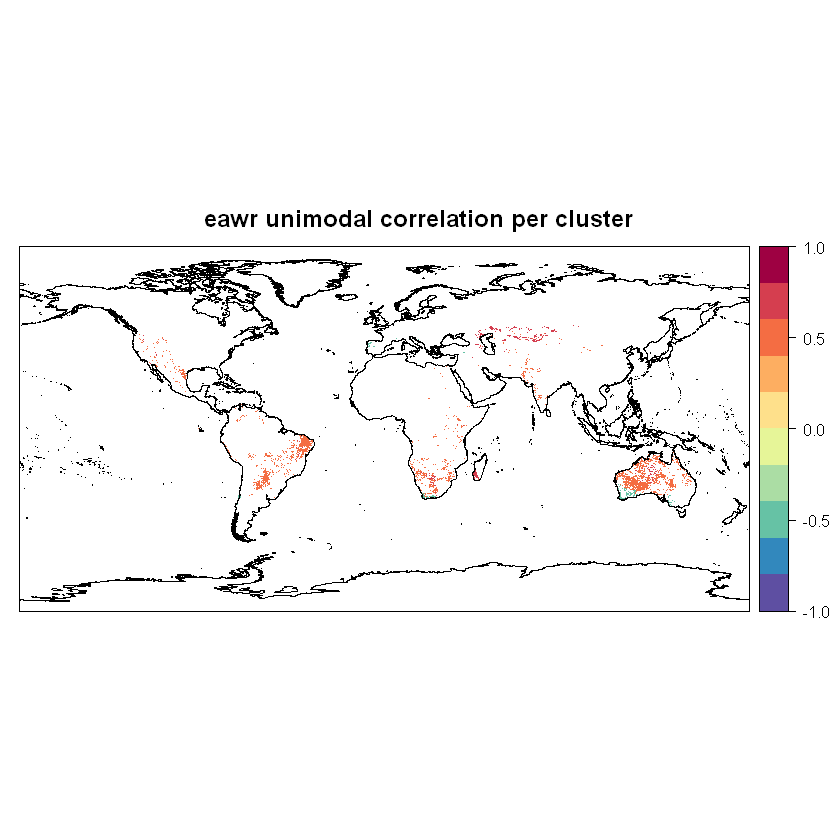

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

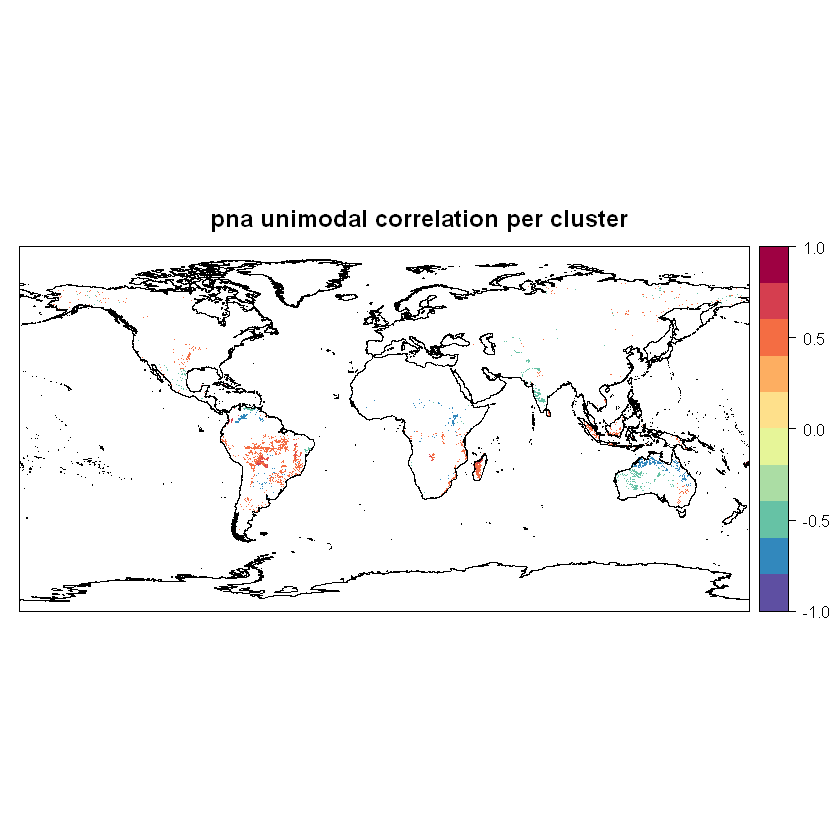

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

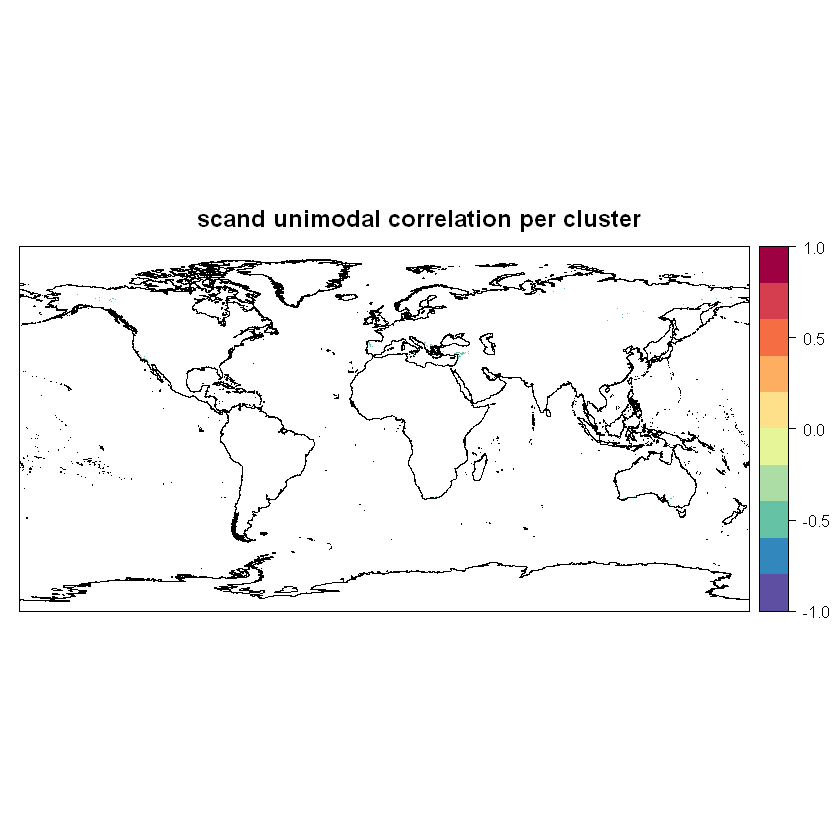

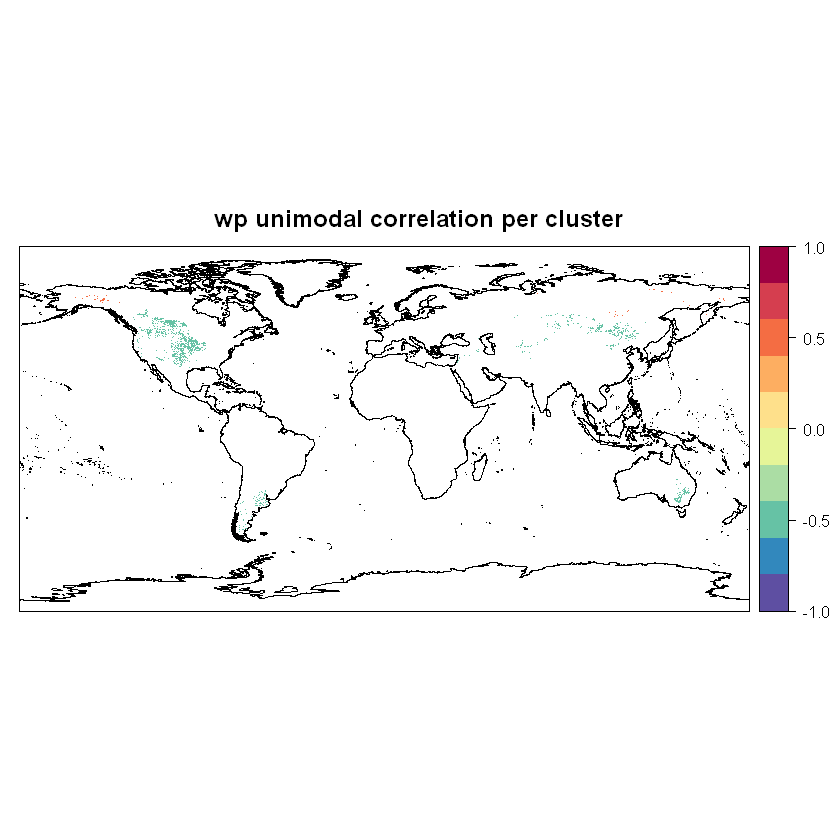

In [28]:
corr.df.lag.2 = masked_coords
t = 2
corr.df.lag.2 = corr.annual.clus(log1p(masked_ba_series), fireSeasonPer75_def, masked_coords, dates, nina34, 'nina34', corr.df.lag.2,
                           mode = 'unimodal', t = t)
corr.df.lag.2 = corr.annual.clus(log1p(masked_ba_series), fireSeasonPer75_def, masked_coords, dates, nao, 'nao', corr.df.lag.2,
                           mode = 'unimodal', t = t)
corr.df.lag.2 = corr.annual.clus(log1p(masked_ba_series), fireSeasonPer75_def, masked_coords, dates, poleur, 'poleur', corr.df.lag.2,
                           mode = 'unimodal', t = t)
corr.df.lag.2 = corr.annual.clus(log1p(masked_ba_series), fireSeasonPer75_def, masked_coords, dates, ea, 'ea', corr.df.lag.2, 
                           mode = 'unimodal', t = t)
corr.df.lag.2 = corr.annual.clus(log1p(masked_ba_series), fireSeasonPer75_def, masked_coords, dates, eawr, 'eawr', corr.df.lag.2, 
                           mode = 'unimodal', t = t)
corr.df.lag.2 = corr.annual.clus(log1p(masked_ba_series), fireSeasonPer75_def, masked_coords, dates, pna, 'pna', corr.df.lag.2, 
                           mode = 'unimodal', t = t)
corr.df.lag.2 = corr.annual.clus(log1p(masked_ba_series), fireSeasonPer75_def, masked_coords, dates, scand, 'scand', corr.df.lag.2, 
                           mode = 'unimodal', t = t)
corr.df.lag.2 = corr.annual.clus(log1p(masked_ba_series), fireSeasonPer75_def, masked_coords, dates, wp, 'wp', corr.df.lag.2, 
                           mode = 'unimodal', t = t)

#save(corr.df.lag.2, file = 'corrDfAnnualClusLag2.Rdata')

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

Number of pixels correlated with more than  0  indexes  30573 
Number of pixels correlated with more than  1  indexes  7253 
Number of pixels correlated with more than  2  indexes  0 
Number of pixels correlated with more than  3  indexes  0 
Number of pixels correlated with more than  4  indexes  0 
Number of pixels correlated with more than  5  indexes  0 
Number of pixels correlated with more than  6  indexes  0 
Number of pixels correlated with more than  7  indexes  0 


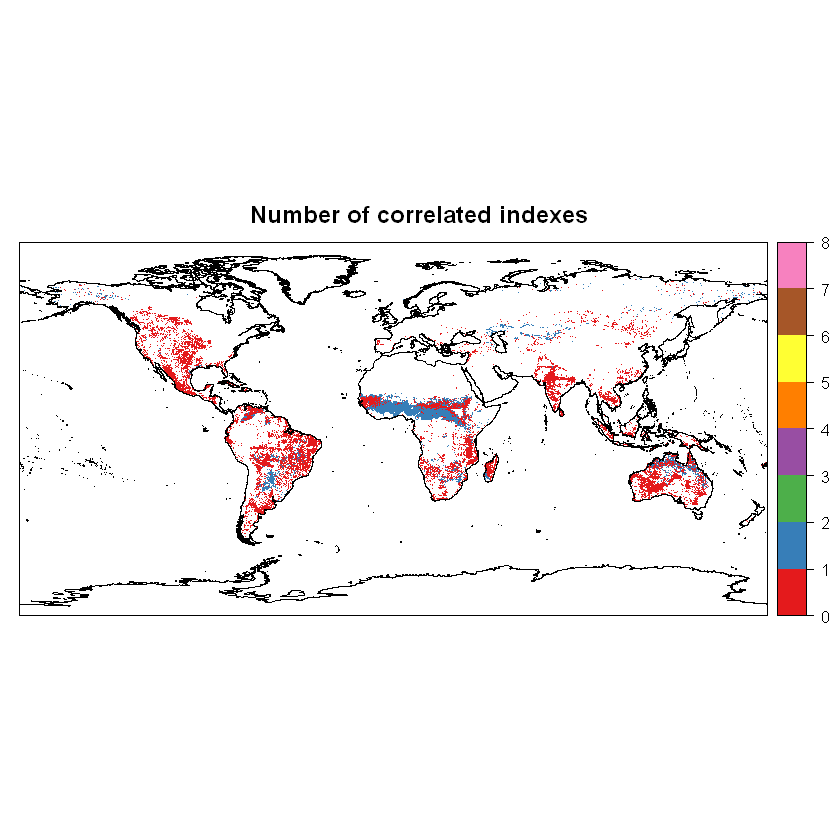

In [29]:
arg.list <- list(col.regions = brewer.pal(8, 'Set1'),
                          at = seq(0, 8, 1), main = 'Number of correlated indexes')

v = cbind(as.numeric(corr.df.lag.2$nao.pvalue<0.05), as.numeric(corr.df.lag.2$poleur.pvalue<0.05),
          as.numeric(corr.df.lag.2$ea.pvalue<0.05), as.numeric(corr.df.lag.2$eawr.pvalue<0.05),
          as.numeric(corr.df.lag.2$pna.pvalue<0.05), as.numeric(corr.df.lag.2$nina34.pvalue<0.05), 
          as.numeric(corr.df.lag.2$scand.pvalue<0.05), as.numeric(corr.df.lag.2$wp.pvalue<0.05))

suma = rowSums(v, na.rm=T)
v <- suma
v[which(v < 1)] <- NA

df1 <- cbind.data.frame(masked_coords, v)
coordinates(df1) <- c(1,2)
gridded(df1) <- TRUE
arg.list[["sp.layout"]] <- list("sp.lines", coast.lines)
arg.list[["obj"]] <- df1
arg.list[["zcol"]] <- 1
arg.list[["ylim"]] <- c(-90,90)
arg.list[["xlim"]] <- c(-180,180)
do.call("spplot", arg.list) %>% print()

for (i in 1:8){
    cat('Number of pixels correlated with more than ', i-1, ' indexes ', sum(suma > i-1), '\n')
}

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

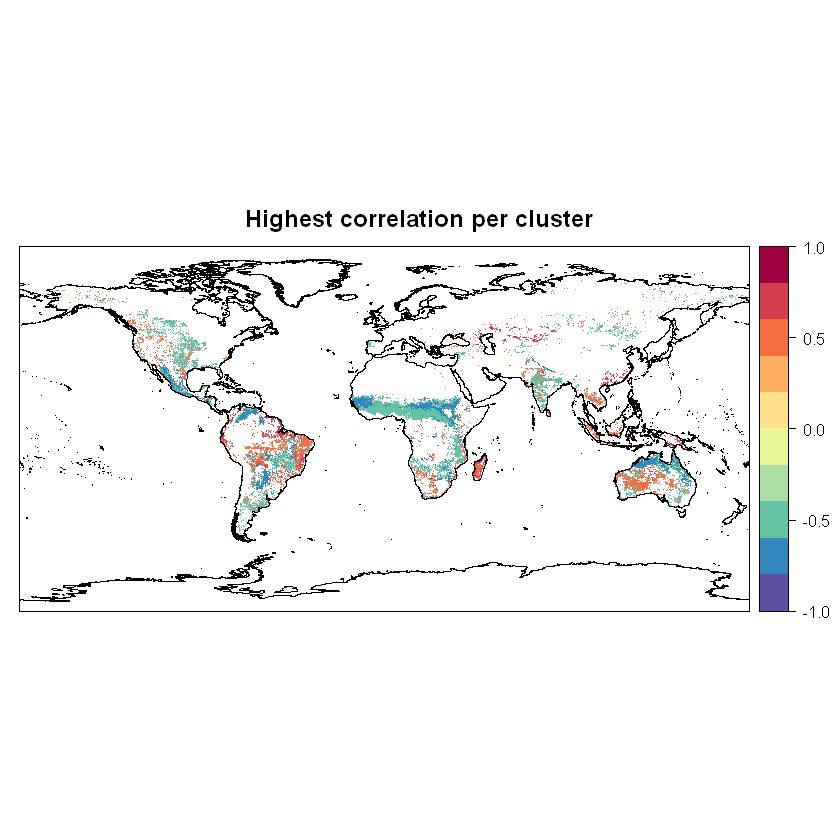

In [30]:
arg.list <- list(col.regions = group.colors[11:1][-6],
                      at = seq(-1, 1, 0.2), main = 'Highest correlation per cluster')

v = apply(corr.df.lag.2, 1, function (x) getMaxCorr(x))

df1 <- cbind.data.frame(masked_coords, v)
coordinates(df1) <- c(1,2)
gridded(df1) <- TRUE
arg.list[["sp.layout"]] <- list("sp.lines", coast.lines)
arg.list[["obj"]] <- df1
arg.list[["zcol"]] <- 1
arg.list[["ylim"]] <- c(-90,90)
arg.list[["xlim"]] <- c(-180,180)
do.call("spplot", arg.list) %>% print()

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

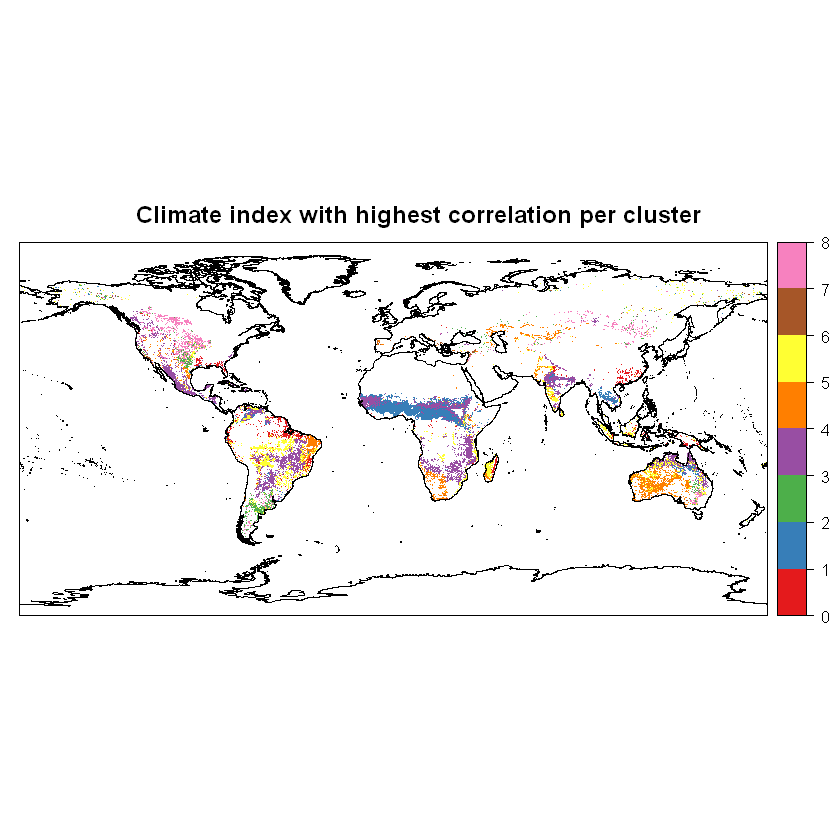

In [31]:
arg.list <- list(col.regions = brewer.pal(8, 'Set1'),
                          at = seq(0, 8, 1), main = 'Climate index with highest correlation per cluster')
v = apply(corr.df.lag.2, 1, function (x) getIndWithMaxCorr(x))

df1 <- cbind.data.frame(masked_coords, v)
coordinates(df1) <- c(1,2)
gridded(df1) <- TRUE
arg.list[["sp.layout"]] <- list("sp.lines", coast.lines)
arg.list[["obj"]] <- df1
arg.list[["zcol"]] <- 1
arg.list[["ylim"]] <- c(-90,90)
arg.list[["xlim"]] <- c(-180,180)
do.call("spplot", arg.list) %>% print()

## Con persistencia de 3 meses

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

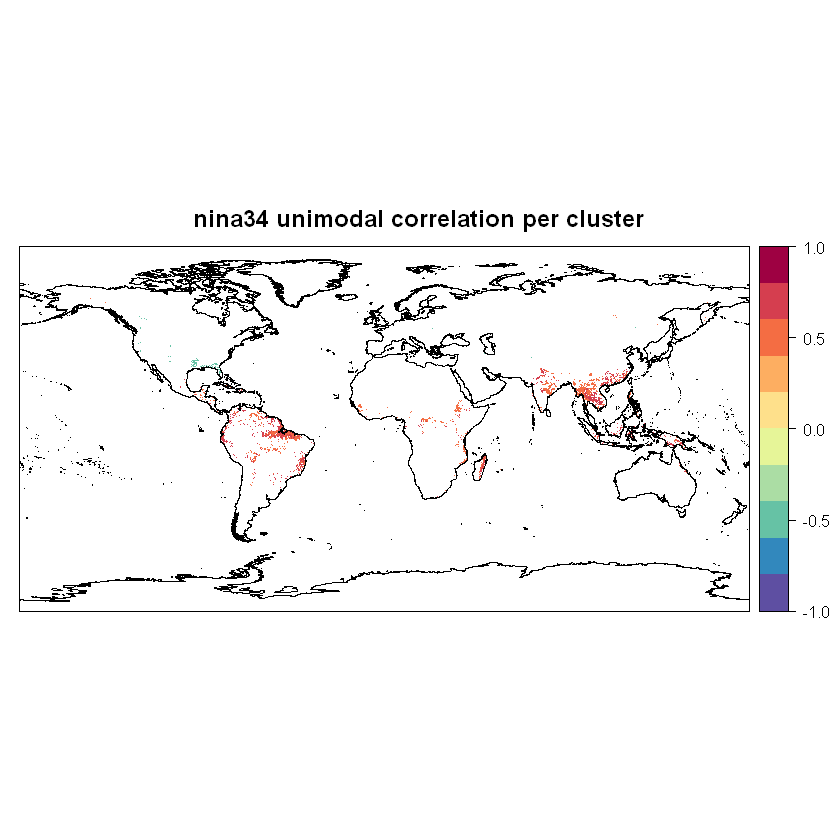

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

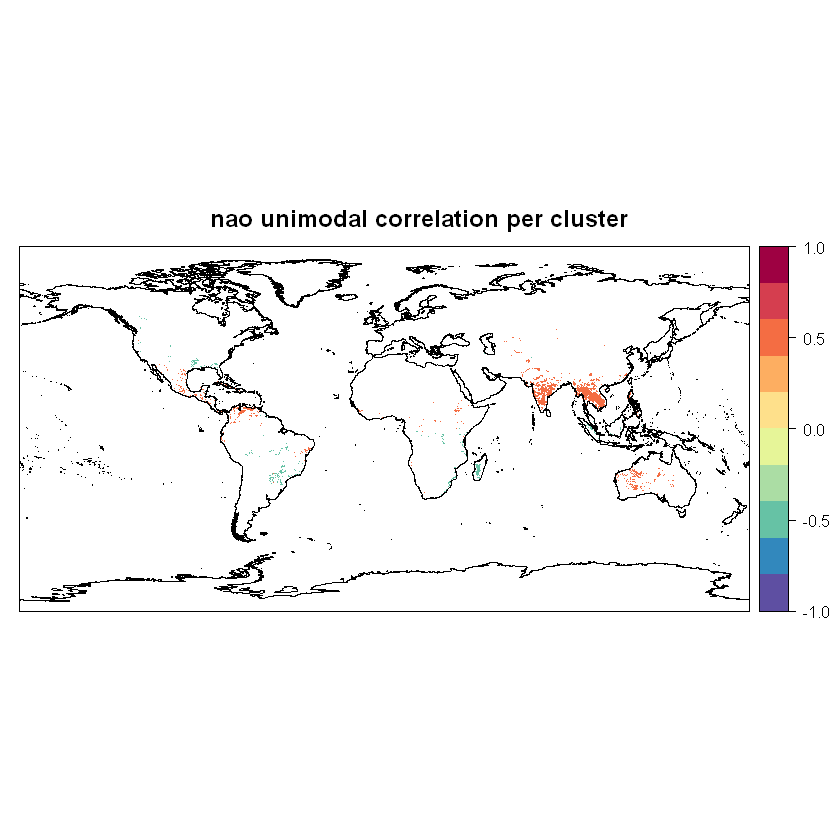

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

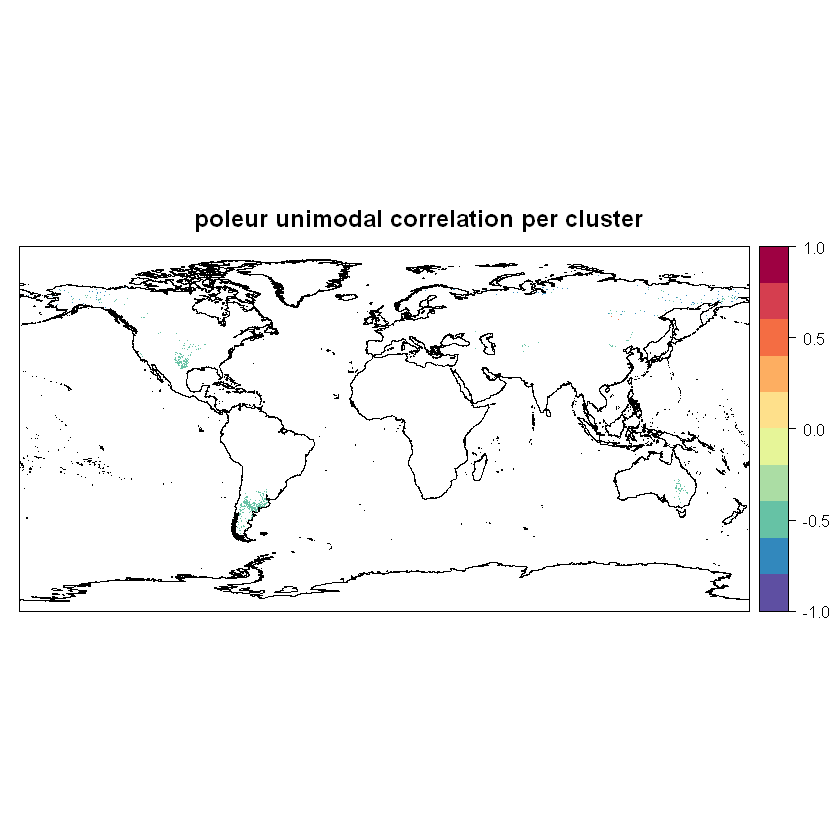

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

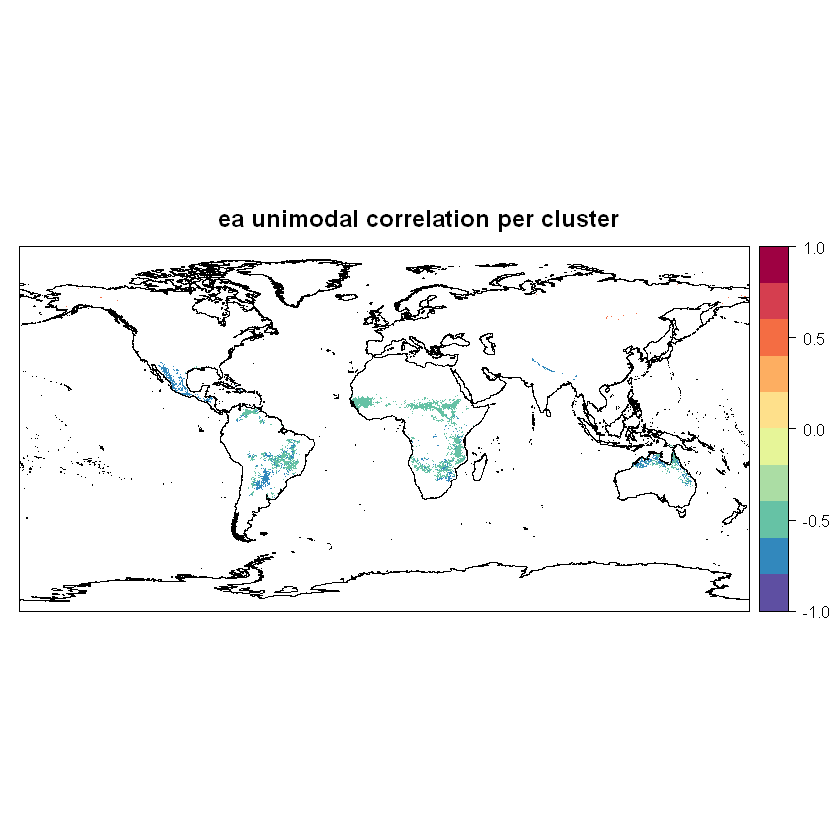

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

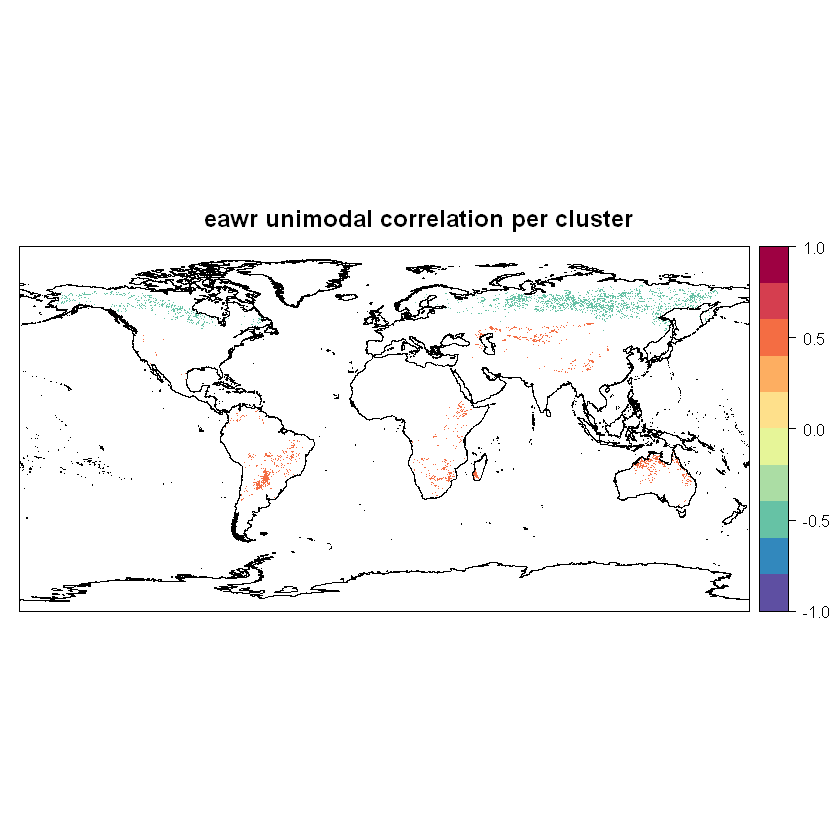

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

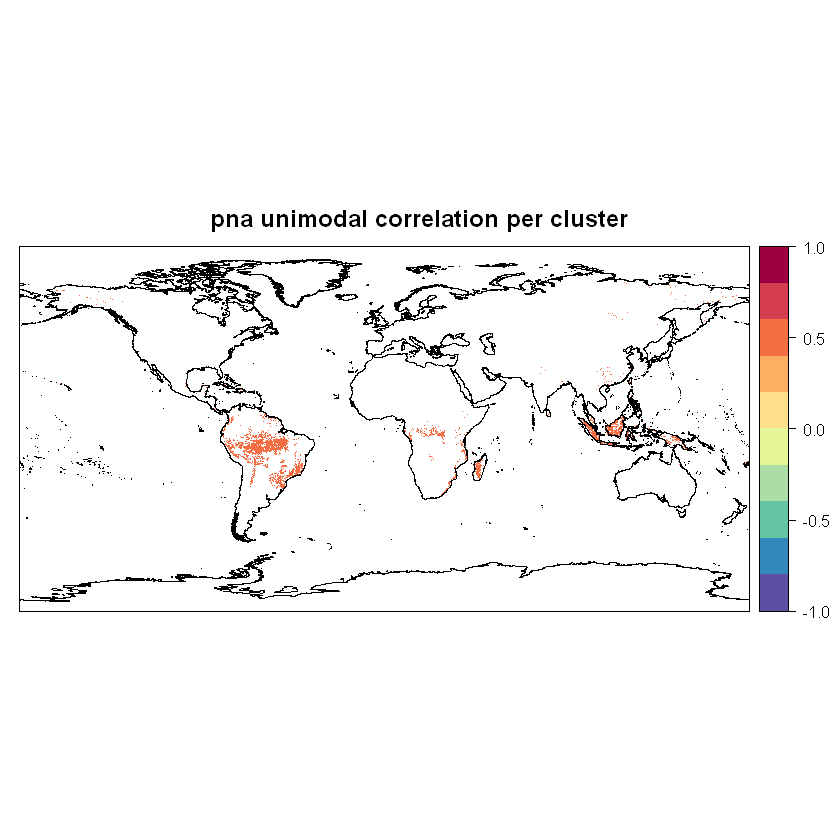

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

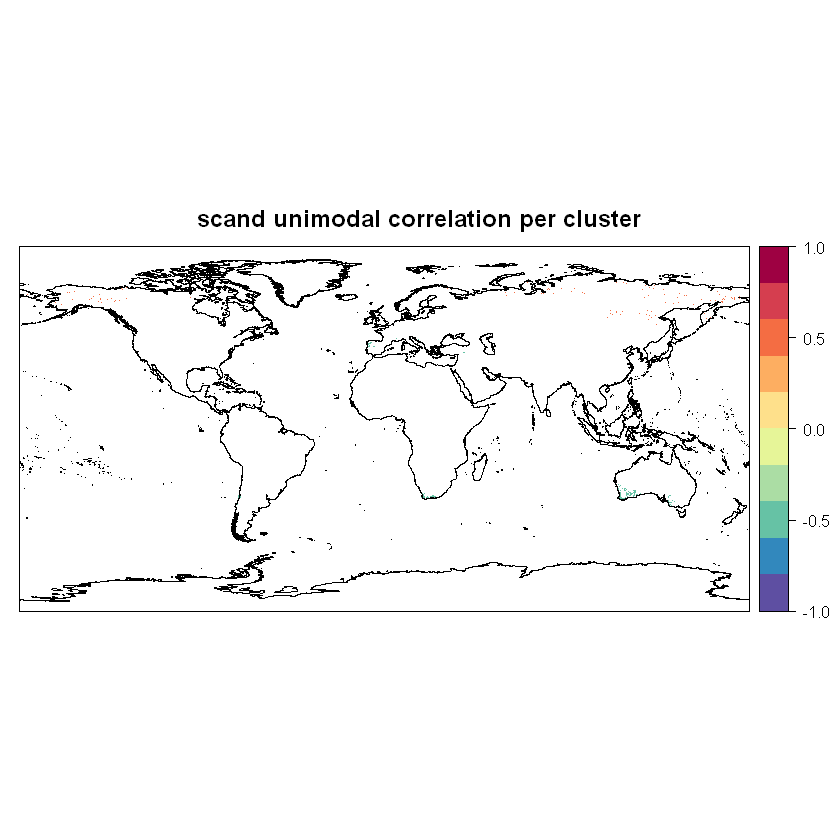

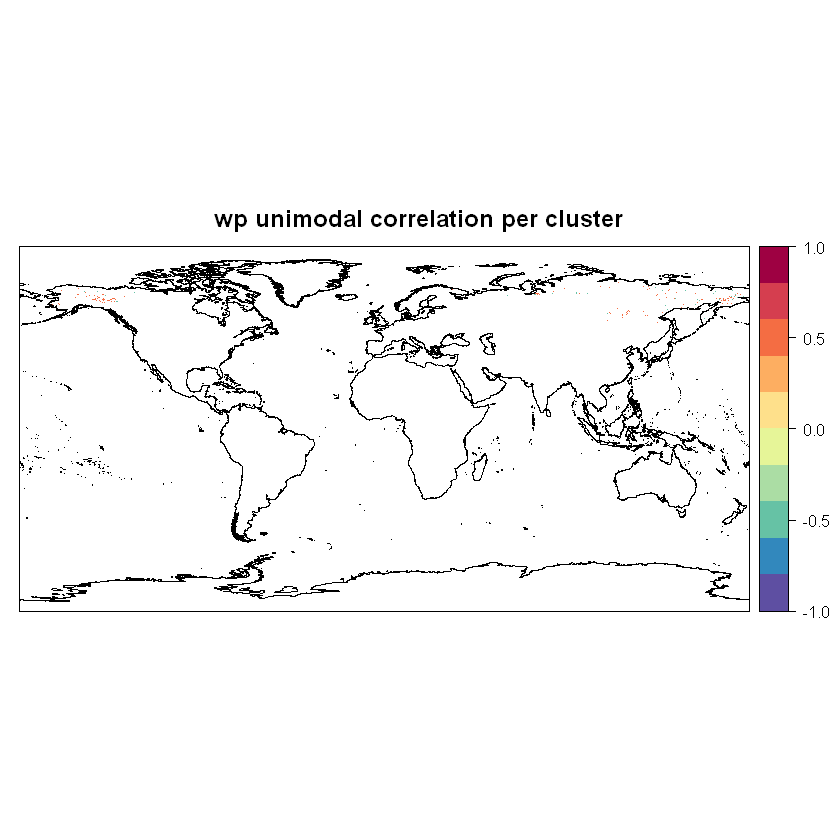

In [32]:
corr.df.lag.3 = masked_coords
t = 3
corr.df.lag.3 = corr.annual.clus(log1p(masked_ba_series), fireSeasonPer75_def, masked_coords, dates, nina34, 'nina34', corr.df.lag.3,
                           mode = 'unimodal', t = t)
corr.df.lag.3 = corr.annual.clus(log1p(masked_ba_series), fireSeasonPer75_def, masked_coords, dates, nao, 'nao', corr.df.lag.3,
                           mode = 'unimodal', t = t)
corr.df.lag.3 = corr.annual.clus(log1p(masked_ba_series), fireSeasonPer75_def, masked_coords, dates, poleur, 'poleur', corr.df.lag.3,
                           mode = 'unimodal', t = t)
corr.df.lag.3 = corr.annual.clus(log1p(masked_ba_series), fireSeasonPer75_def, masked_coords, dates, ea, 'ea', corr.df.lag.3, 
                           mode = 'unimodal', t = t)
corr.df.lag.3 = corr.annual.clus(log1p(masked_ba_series), fireSeasonPer75_def, masked_coords, dates, eawr, 'eawr', corr.df.lag.3, 
                           mode = 'unimodal', t = t)
corr.df.lag.3 = corr.annual.clus(log1p(masked_ba_series), fireSeasonPer75_def, masked_coords, dates, pna, 'pna', corr.df.lag.3, 
                           mode = 'unimodal', t = t)
corr.df.lag.3 = corr.annual.clus(log1p(masked_ba_series), fireSeasonPer75_def, masked_coords, dates, scand, 'scand', corr.df.lag.3, 
                           mode = 'unimodal', t = t)
corr.df.lag.3 = corr.annual.clus(log1p(masked_ba_series), fireSeasonPer75_def, masked_coords, dates, wp, 'wp', corr.df.lag.3, 
                           mode = 'unimodal', t = t)

#save(corr.df.lag.3, file = 'corrDfAnnualClusLag3.Rdata')

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

Number of pixels correlated with more than  0  indexes  28215 
Number of pixels correlated with more than  1  indexes  4031 
Number of pixels correlated with more than  2  indexes  0 
Number of pixels correlated with more than  3  indexes  0 
Number of pixels correlated with more than  4  indexes  0 
Number of pixels correlated with more than  5  indexes  0 
Number of pixels correlated with more than  6  indexes  0 
Number of pixels correlated with more than  7  indexes  0 


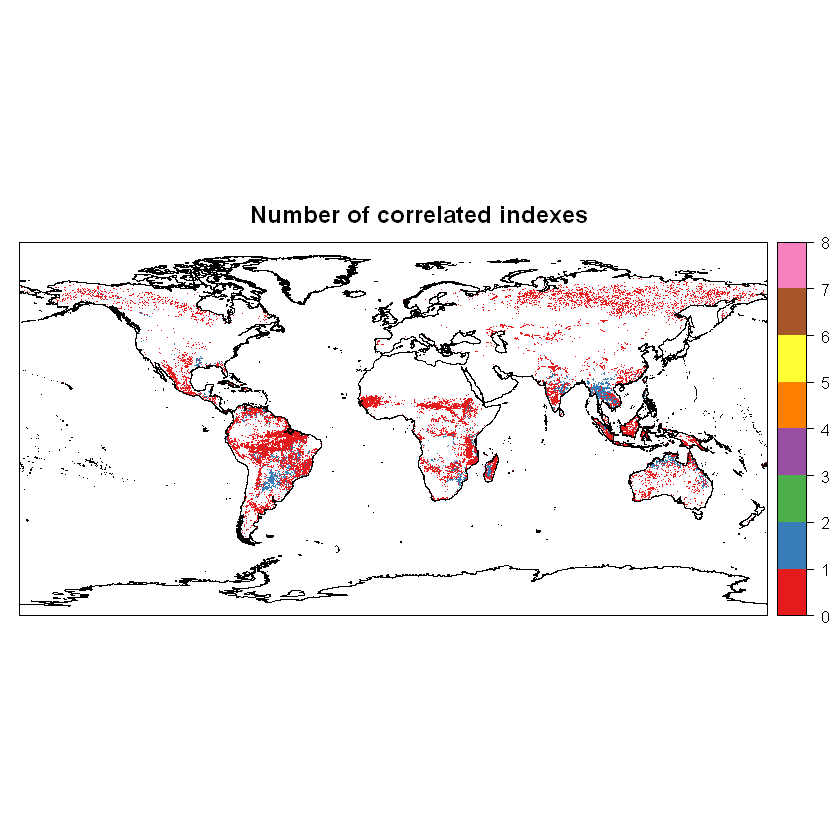

In [33]:
arg.list <- list(col.regions = brewer.pal(8, 'Set1'),
                          at = seq(0, 8, 1), main = 'Number of correlated indexes')

v = cbind(as.numeric(corr.df.lag.3$nao.pvalue<0.05), as.numeric(corr.df.lag.3$poleur.pvalue<0.05),
          as.numeric(corr.df.lag.3$ea.pvalue<0.05), as.numeric(corr.df.lag.3$eawr.pvalue<0.05),
          as.numeric(corr.df.lag.3$pna.pvalue<0.05), as.numeric(corr.df.lag.3$nina34.pvalue<0.05), 
          as.numeric(corr.df.lag.3$scand.pvalue<0.05), as.numeric(corr.df.lag.3$wp.pvalue<0.05))

suma = rowSums(v, na.rm=T)
v <- suma
v[which(v < 1)] <- NA

df1 <- cbind.data.frame(masked_coords, v)
coordinates(df1) <- c(1,2)
gridded(df1) <- TRUE
arg.list[["sp.layout"]] <- list("sp.lines", coast.lines)
arg.list[["obj"]] <- df1
arg.list[["zcol"]] <- 1
arg.list[["ylim"]] <- c(-90,90)
arg.list[["xlim"]] <- c(-180,180)
do.call("spplot", arg.list) %>% print()

for (i in 1:8){
    cat('Number of pixels correlated with more than ', i-1, ' indexes ', sum(suma > i-1), '\n')
}

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

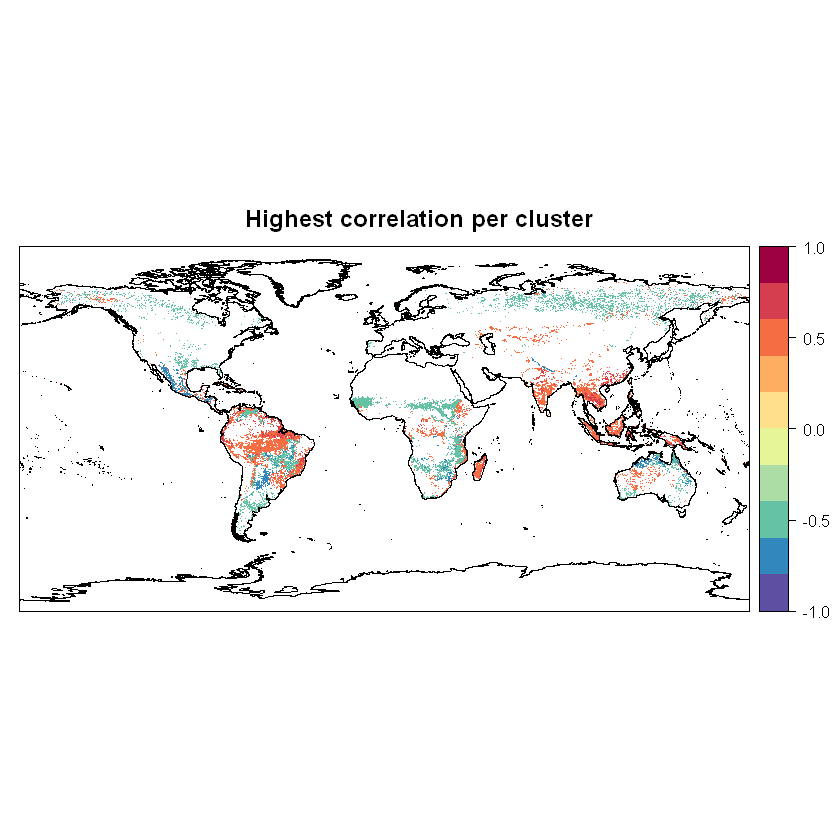

In [34]:
arg.list <- list(col.regions = group.colors[11:1][-6],
                      at = seq(-1, 1, 0.2), main = 'Highest correlation per cluster')

v = apply(corr.df.lag.3, 1, function (x) getMaxCorr(x))

df1 <- cbind.data.frame(masked_coords, v)
coordinates(df1) <- c(1,2)
gridded(df1) <- TRUE
arg.list[["sp.layout"]] <- list("sp.lines", coast.lines)
arg.list[["obj"]] <- df1
arg.list[["zcol"]] <- 1
arg.list[["ylim"]] <- c(-90,90)
arg.list[["xlim"]] <- c(-180,180)
do.call("spplot", arg.list) %>% print()

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

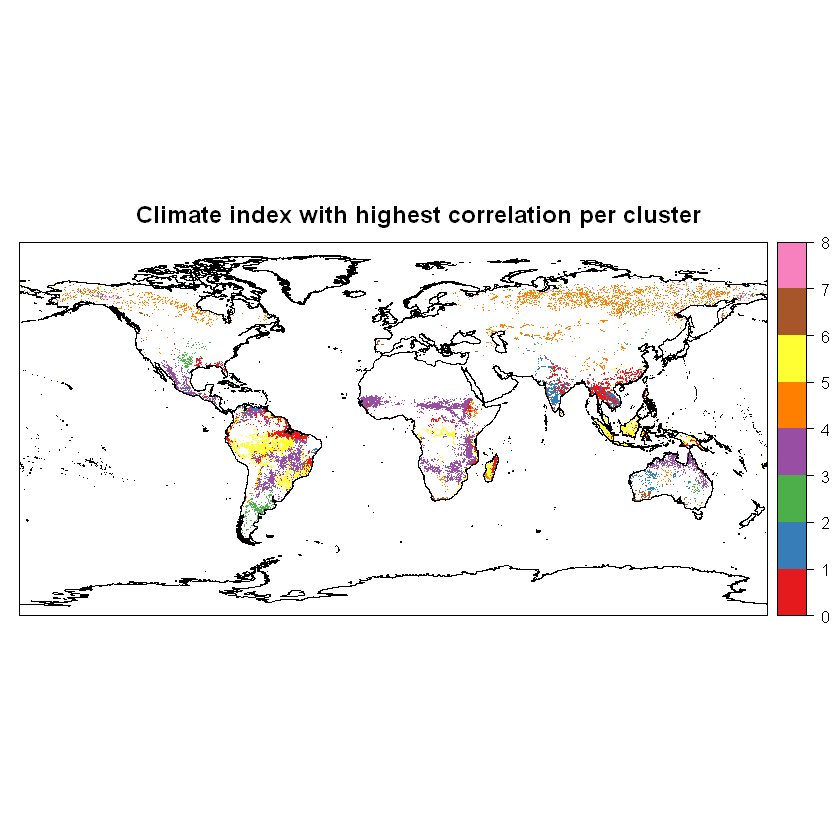

In [35]:
arg.list <- list(col.regions = brewer.pal(8, 'Set1'),
                          at = seq(0, 8, 1), main = 'Climate index with highest correlation per cluster')
v = apply(corr.df.lag.3, 1, function (x) getIndWithMaxCorr(x))

df1 <- cbind.data.frame(masked_coords, v)
coordinates(df1) <- c(1,2)
gridded(df1) <- TRUE
arg.list[["sp.layout"]] <- list("sp.lines", coast.lines)
arg.list[["obj"]] <- df1
arg.list[["zcol"]] <- 1
arg.list[["ylim"]] <- c(-90,90)
arg.list[["xlim"]] <- c(-180,180)
do.call("spplot", arg.list) %>% print()

## Combining all

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

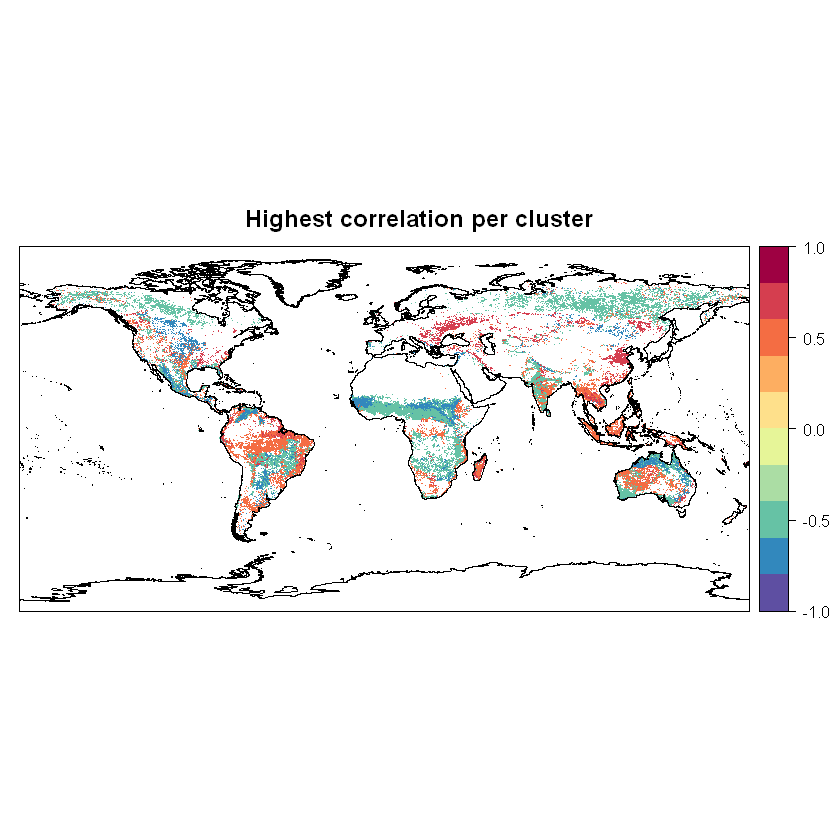

In [36]:
arg.list <- list(col.regions = group.colors[11:1][-6],
                      at = seq(-1, 1, 0.2), main = 'Highest correlation per cluster')

v = apply(cbind(corr.df, corr.df.lag.1[,-c(1,2)], corr.df.lag.2[,-c(1,2)], corr.df.lag.3[,-c(1,2)]), 1,
          function (x) getMaxCorr(x))

df1 <- cbind.data.frame(masked_coords, v)
coordinates(df1) <- c(1,2)
gridded(df1) <- TRUE
arg.list[["sp.layout"]] <- list("sp.lines", coast.lines)
arg.list[["obj"]] <- df1
arg.list[["zcol"]] <- 1
arg.list[["ylim"]] <- c(-90,90)
arg.list[["xlim"]] <- c(-180,180)
do.call("spplot", arg.list) %>% print()

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

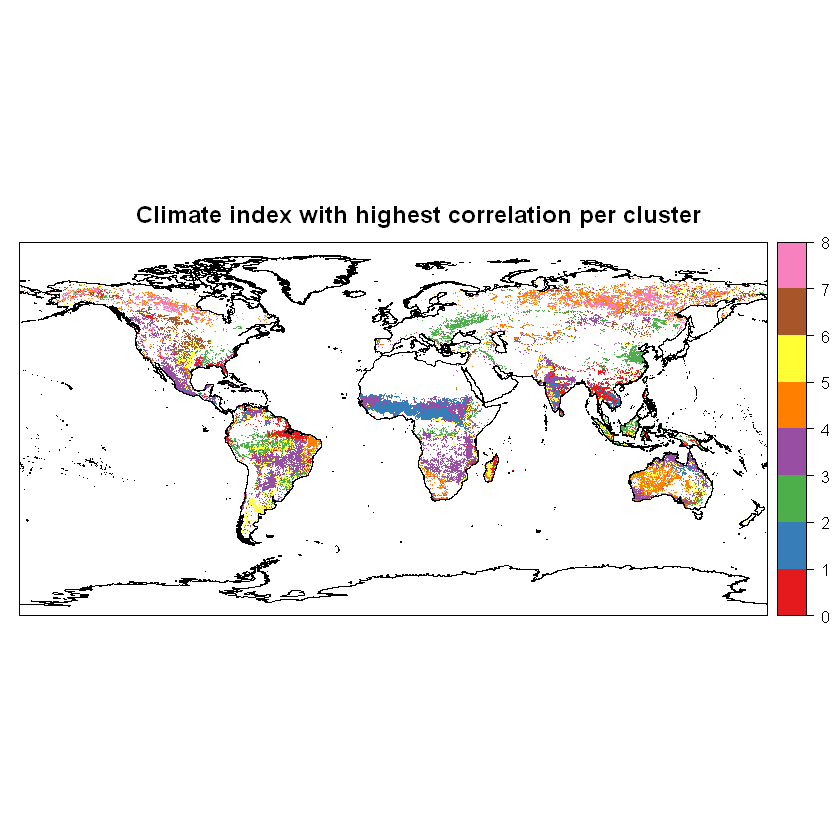

In [37]:
arg.list <- list(col.regions = brewer.pal(8, 'Set1'),
                          at = seq(0, 8, 1), main = 'Climate index with highest correlation per cluster')
v = apply(cbind(corr.df, corr.df.lag.1[,-c(1,2)], corr.df.lag.2[,-c(1,2)], corr.df.lag.3[,-c(1,2)]), 1,
          function (x) getIndWithMaxCorr(x))

df1 <- cbind.data.frame(masked_coords, v)
coordinates(df1) <- c(1,2)
gridded(df1) <- TRUE
arg.list[["sp.layout"]] <- list("sp.lines", coast.lines)
arg.list[["obj"]] <- df1
arg.list[["zcol"]] <- 1
arg.list[["ylim"]] <- c(-90,90)
arg.list[["xlim"]] <- c(-180,180)
do.call("spplot", arg.list) %>% print()